#### Preliminary Wrangling

In [98]:
from sklearn.decomposition import IncrementalPCA

In [2]:
import pandas as pd
from IPython.display import HTML
import piplite
import numpy as np
%pip install seaborn
%pip install imblearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import re
import matplotlib.pyplot as plt
import random
#Sklearn
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('train.csv')

In [4]:
# high-level overview of data shape and composition
print("Number of Rows in day.csv : ",df.shape[0],"\nNumber of columns in day.csv : ",df.shape[1])

Number of Rows in day.csv :  69999 
Number of columns in day.csv :  172


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 89.5+ MB


In [6]:
print("\n DataSet : Train.csv \n")
df.head(1)


 DataSet : Train.csv 



id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  31.277   

   arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  87.009   7.527        48.58       124.38         1.29         32.24   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33            0.0            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.0            0.0            0.0              2.23   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.0              0.28              5.29             16.04   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33               0.0               0.0               0.0   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0               0.0          7.53   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              1.01             18.75             80.61               0.0   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.0               0.0         65.09        204.99   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          1.01           0.0           0.0           0.0           8.2   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0          0.63           0.0         0.38          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0           81.21          221.68            3.63              2.43   

   loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0              3.68              7.79              0.83             21.08   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
0             16.91               0.0               0.0               0.0   

   loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
0          3.26         24.76         24.71               0.0   

   std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
0              7.61              0.21              7.46             19.96   

   std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  \
0             14.96               0.0               0.0               0.0   

   std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  \
0               0.0               0.0               0.0          7.46   

   std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0         27.58         15.18           11.84           53.04           40.56   

   spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
0           0.0           0.0          0.66           0.0           0.0   

   isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
0           0.0         1.11         0.69          0.0                 3   

   total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
0                 2                 2                77                65   

   total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                10              65              65              10   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/22/2014           7/10/2014           8/24/2

In [7]:
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

#### Data Dictionary

In [8]:
data_dictionary = pd.read_csv('data_dictionary.csv')

In [9]:
data_dictionary

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

#### Assessing

In [10]:
# Check duplicated value
display(HTML(f"Number of duplicated values in the dataset : {df.duplicated().sum()}"))

In [11]:
# Check null value for each column
null_cols = df.columns[df.isnull().all(axis=0)].tolist()

print(f"List of columns with NULL's : \n\n {null_cols} \n")
print(f"Count of columns having all NULL values : {len(null_cols)}")

List of columns with NULL's : 

 [] 

Count of columns having all NULL values : 0


In [12]:
uniq_list = df.columns[(df.nunique() == 1)].tolist()
print("List of columns that have same value for all records : \n\n", uniq_list )
print("\nCount of columns that have same value for all records : ", len(uniq_list) )

List of columns that have same value for all records : 

 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Count of columns that have same value for all records :  13


##### Removing all the columns having the same value from the dataset

In [13]:
# Finding Columns with more than 50% of the data as NAN
nan_columns  = df.columns[round(100* (df.isnull().sum()/len(df.index)),2) > 50].tolist()
print("List of columns that have null records for more than 50% of the data : \n\n", nan_columns )
print("\nCount of columns that have have null records for more than 50% of the data : ", len(nan_columns) )

List of columns that have null records for more than 50% of the data : 

 ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

Count of columns that have have null records for more than 50% of the data :  30


#### Cleaning

In [14]:
# Remove columns that have same value for all records
# First create a copy of the dataset to preserve original data
df_clean = df.copy()

In [15]:
df_clean = df.drop(uniq_list,axis=1)

In [16]:
df_clean.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [17]:
df_clean.shape

(69999, 159)

In [18]:
# Remove columns with more than 50% of the data as NAN
df_clean.drop(nan_columns,axis=1,inplace=True)

In [19]:
round(100* (df_clean.isnull().sum()/len(df.index)),2) 

id                     0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            3.95
onnet_mou_7            3.84
onnet_mou_8            5.29
offnet_mou_6           3.95
offnet_mou_7           3.84
offnet_mou_8           5.29
roam_ic_mou_6          3.95
roam_ic_mou_7          3.84
roam_ic_mou_8          5.29
roam_og_mou_6          3.95
roam_og_mou_7          3.84
roam_og_mou_8          5.29
loc_og_t2t_mou_6       3.95
loc_og_t2t_mou_7       3.84
loc_og_t2t_mou_8       5.29
loc_og_t2m_mou_6       3.95
loc_og_t2m_mou_7       3.84
loc_og_t2m_mou_8       5.29
loc_og_t2f_mou_6       3.95
loc_og_t2f_mou_7       3.84
loc_og_t2f_mou_8       5.29
loc_og_t2c_mou_6       3.95
loc_og_t2c_mou_7       3.84
loc_og_t2c_mou_8       5.29
loc_og_mou_6           3.95
loc_og_mou_7           3.84
loc_og_mou_8           5.29
std_og_t2t_mou_6       3.95
std_og_t2t_mou_7       3.84
std_og_t2t_mou_8       5.29
std_og_t2m_mou_6       3.95
std_og_t2m_mou_7    

In [20]:
# Remove id column since its redundant
df_clean.drop(['id'],axis=1,inplace=True)

In [21]:
df_clean.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

In [22]:
df_clean.shape

(69999, 128)

In [23]:
df_clean.columns[round(100* (df_clean.isnull().sum()/len(df_clean.index)),2) > 0.0]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [24]:
### Imputing NAN values with their mean and mode for object columns
def impute_values (df):
    nan_columns  = df.columns[round(100* (df.isnull().sum()/len(df.index)),2) > 0.0].tolist()
    print("List of columns that have null records : \n\n", nan_columns )
    print("\nCount of columns that have have null records  : ", len(nan_columns) )
    object_cols = df.select_dtypes('object')
    print("List of columns that are of object type : \n\n", object_cols.columns.tolist() )
    float_nan_columns = [x for x in nan_columns if x not in object_cols]
    print("List of columns that are of float type : \n\n", object_cols.columns.tolist() )
    df[float_nan_columns].mean()
    print("Mean of columns : \n\n",df[float_nan_columns].mean())
    df[float_nan_columns] = df[float_nan_columns].fillna(df[float_nan_columns].mean())
    object_columns = object_cols.columns.tolist()
    print(df[object_columns].mode())
    for i in object_columns:
        df[i] = df[i].fillna(df[i].mode()[0])
    nan_columns  = df.columns[round(100* (df.isnull().sum()/len(df.index)),2) > 0.0].tolist()
    print("List of columns that have null records : \n\n", nan_columns )
    
impute_values(df_clean)

List of columns that have null records : 

 ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'lo

In [25]:
df_clean.head(1)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  31.277  87.009   7.527        48.58       124.38         1.29   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23               0.0              0.28              5.29   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33               0.0               0.0   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.0               0.0               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0               0.0               0.0               0.0   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0         65.09        204.99          1.01           0.0           0.0   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.0           8.2          0.63           0.0         0.38   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.0          0.0           81.21          221.68            3.63   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0              2.43              3.68              7.79              0.83   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0             21.08             16.91               0.0               0.0   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0               0.0          3.26         24.76         24.71   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0               0.0              7.61              0.21              7.46   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0             19.96             14.96               0.0               0.0   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0               0.0          7.46         27.58         15.18           11.84   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0           53.04           40.56           0.0           0.0          0.66   

   isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  \
0           0.0           0.0           0.0         1.11         0.69   

   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0          0.0                 3                 2                 2   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0                77                65                10              65   

   max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7  \
0              65              10           6/22/2014           7/10/2014   

  date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0           8/24/2014                  65                  65   

   last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0                   0          0.0          0.0          0.0          0.0   

   vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0          0.0          0.0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0            0            0            

In [26]:
# Remove columns with last recharged dates as they are not important for analysis
df_clean.drop('date_of_last_rech_6',axis=1,inplace=True)
df_clean.drop('date_of_last_rech_7',axis=1,inplace=True)
df_clean.drop('date_of_last_rech_8',axis=1,inplace=True)

In [27]:
### Create three separate datasets for the three months to three different datasets

june_columns  = [cols for cols in df_clean.columns if '_6' in cols]
df_clean_june = df_clean.loc[:,june_columns]
df_clean_june['churn_probability'] = df_clean['churn_probability']
july_columns = [cols for cols in df_clean.columns if '_7' in cols]
df_clean_july = df_clean.loc[:,july_columns]
df_clean_july['churn_probability'] = df_clean['churn_probability']
august_columns = [cols for cols in df_clean.columns if '_8' in cols]
df_clean_august = df_clean.loc[:,august_columns]
df_clean_august['churn_probability'] = df_clean['churn_probability']

In [28]:
df_clean_june.shape

(69999, 41)

In [29]:
df_clean_july.shape

(69999, 41)

In [30]:
df_clean_august.shape

(69999, 41)

In [31]:
df_clean.head(1)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  31.277  87.009   7.527        48.58       124.38         1.29   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23               0.0              0.28              5.29   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33               0.0               0.0   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.0               0.0               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0               0.0               0.0               0.0   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0         65.09        204.99          1.01           0.0           0.0   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.0           8.2          0.63           0.0         0.38   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.0          0.0           81.21          221.68            3.63   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0              2.43              3.68              7.79              0.83   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0             21.08             16.91               0.0               0.0   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0               0.0          3.26         24.76         24.71   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0               0.0              7.61              0.21              7.46   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0             19.96             14.96               0.0               0.0   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0               0.0          7.46         27.58         15.18           11.84   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0           53.04           40.56           0.0           0.0          0.66   

   isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  \
0           0.0           0.0           0.0         1.11         0.69   

   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0          0.0                 3                 2                 2   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0                77                65                10              65   

   max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0              65              10                  65                  65   

   last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0                   0          0.0          0.0          0.0          0.0   

   vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0          0.0          0.0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0            0            0            0             0             0   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
0             0      

In [32]:
#converting target column to categorical variable
df_clean['churn_probability'] = df_clean['churn_probability'].astype('category')

# Exploratory Data Analysis

#### __Univariate Analysis__ 
  → Mean, Median, Max, Min, Std, Variance, Count
  → Distribution ( Histogram, CountPlot, BoxPlot)
#### __Bivariate Analysis__
  → Relationship Between 2 Variables ( ScatterPlot, BoxPlot, BarPlot etc)
#### __Multivariate Analysis__
  → Relationship Between more variables ( Heatmap etc.)

## Univariate Exploration

In [33]:
# Class for performing univariate analysis on a specified column in a DataFrame.
class UnivariateAnalysis:
    # Initializes the UnivariateAnalysis object with the given DataFrame.
    def __init__(self, dataframe,column_name):       
        self.dataframe = dataframe
        self.column_name = column_name
        print(f"Initiating detailed analysis of {column_name}...")
        print(f"\nStatistical summary for {self.column_name}:\n{self.dataframe[self.column_name].describe()}")
        mode = self.dataframe[self.column_name].mode()[0]
        print(f"\nThe mode of {self.column_name} is: {mode}\n")

    # Performs univariate analysis on the specified column with bins.
    def analyze_with_bins(self, bin_range=None, discrete=False, value_counts=False):
        sns.set_style('whitegrid')
        plt.figure(figsize=(12, 6))
        print(f"Count summary for {self.column_name}:\n{self.dataframe[self.column_name].value_counts()}") if value_counts else ''
        sns.histplot(data=self.dataframe, x=self.column_name, bins=bin_range, discrete=discrete, kde=True, color='skyblue') if bin_range else sns.histplot(data=self.dataframe, x=self.column_name, kde=True, color='skyblue')
        plt.title(f'Distribution of {self.column_name}', fontsize=16, fontweight='bold')
        
        plt.xlabel(self.column_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(bin_range, rotation=45, fontsize=12) if bin_range else plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.tight_layout()
        plt.show()

    # Performs univariate analysis on the specified column without bins.
    def analyze_without_bins(self):
        sns.set_style('whitegrid')
    
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.histplot(data=self.dataframe, x=self.column_name, ax=ax[0], kde=True, color='salmon')
        ax[0].set_title(f'{self.column_name} Histogram', fontsize=16, fontweight='bold')
    
        sns.boxplot(data=self.dataframe, y=self.column_name, ax=ax[1], palette='muted')
        ax[1].set_title(f'{self.column_name} Box Plot', fontsize=16, fontweight='bold')
    
        for axis in ax:
            axis.set_xlabel(self.column_name, fontsize=14)
            axis.set_ylabel('Frequency', fontsize=14)
            axis.tick_params(axis="x", rotation=45, labelsize=12)
            axis.tick_params(axis="y", labelsize=12)
    
        plt.tight_layout()
        plt.show()

Initiating detailed analysis of churn_probability...

Statistical summary for churn_probability:
count    69999.000000
mean         0.101887
std          0.302502
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn_probability, dtype: float64

The mode of churn_probability is: 0



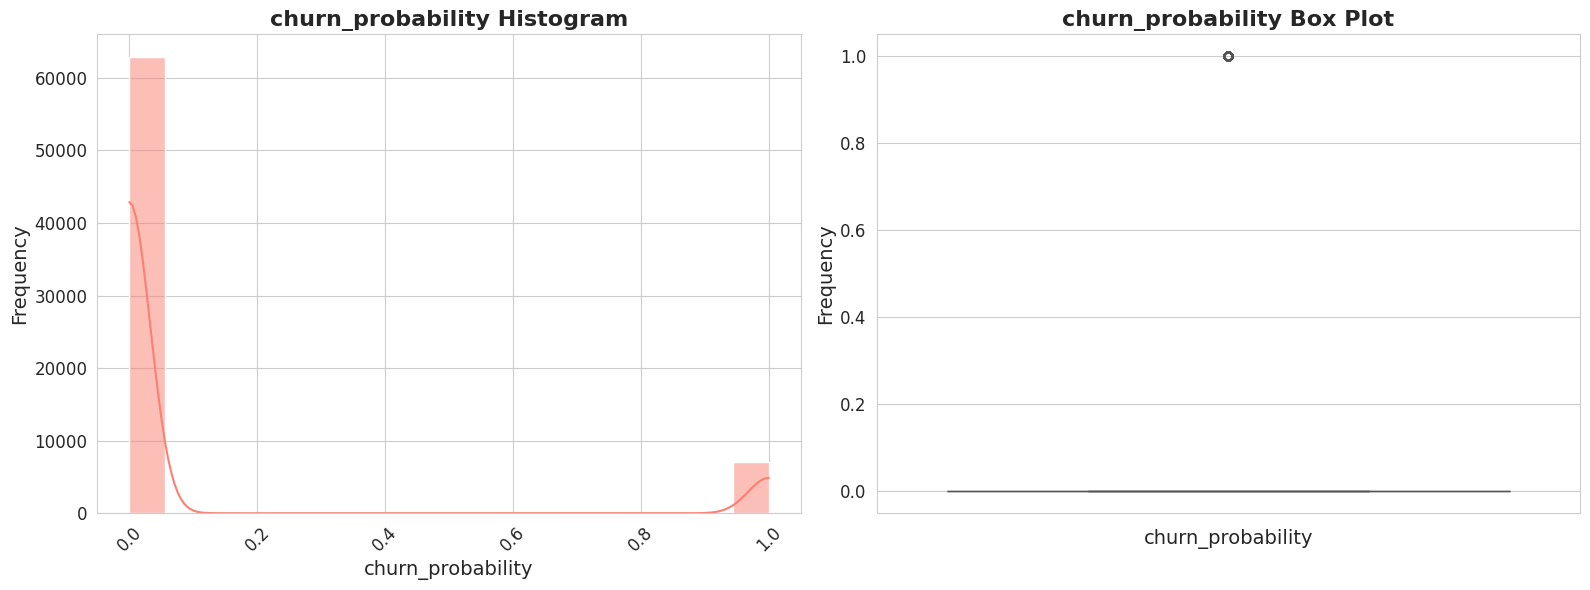

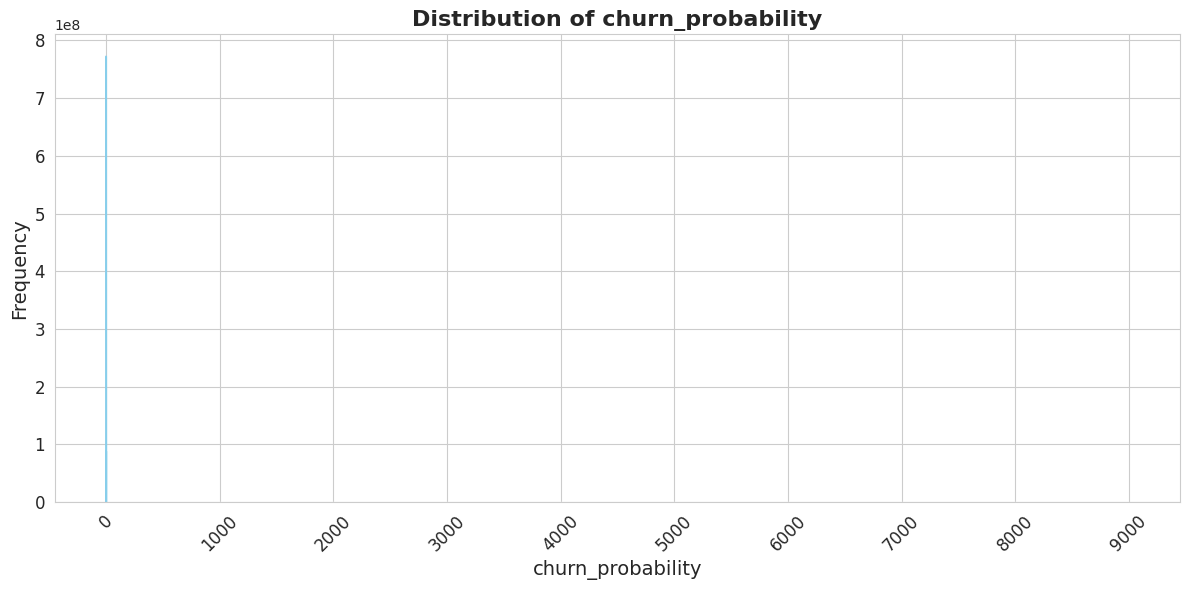

In [34]:
univariate_analysis = UnivariateAnalysis(df_clean_june, 'churn_probability')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 10000, 1000))

Initiating detailed analysis of churn_probability...

Statistical summary for churn_probability:
count    69999.000000
mean         0.101887
std          0.302502
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn_probability, dtype: float64

The mode of churn_probability is: 0



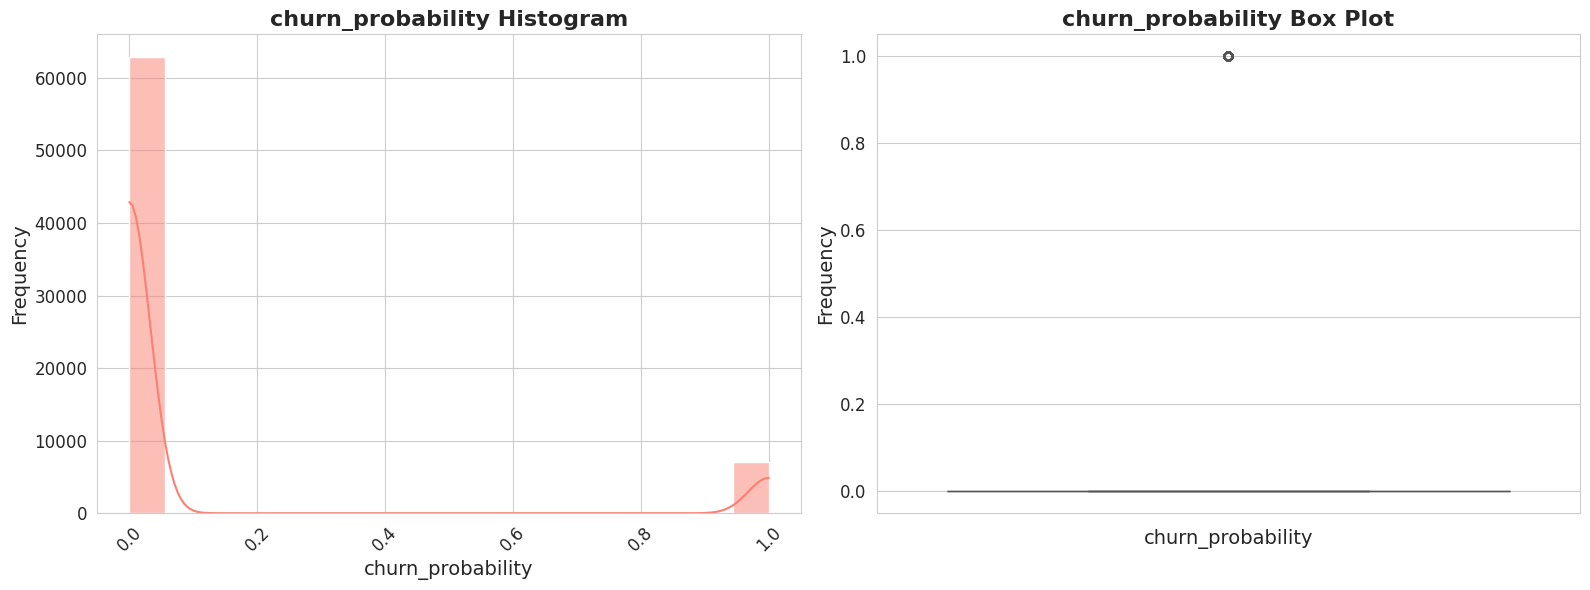

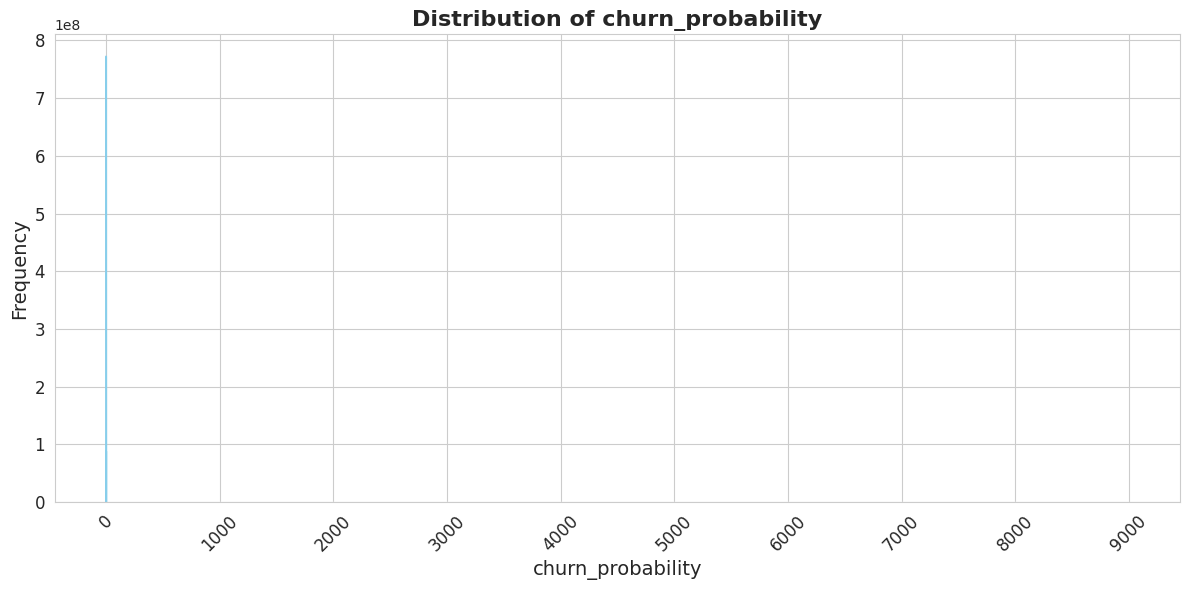

In [35]:
univariate_analysis = UnivariateAnalysis(df_clean_august, 'churn_probability')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 10000, 1000))

Initiating detailed analysis of churn_probability...

Statistical summary for churn_probability:
count    69999.000000
mean         0.101887
std          0.302502
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn_probability, dtype: float64

The mode of churn_probability is: 0



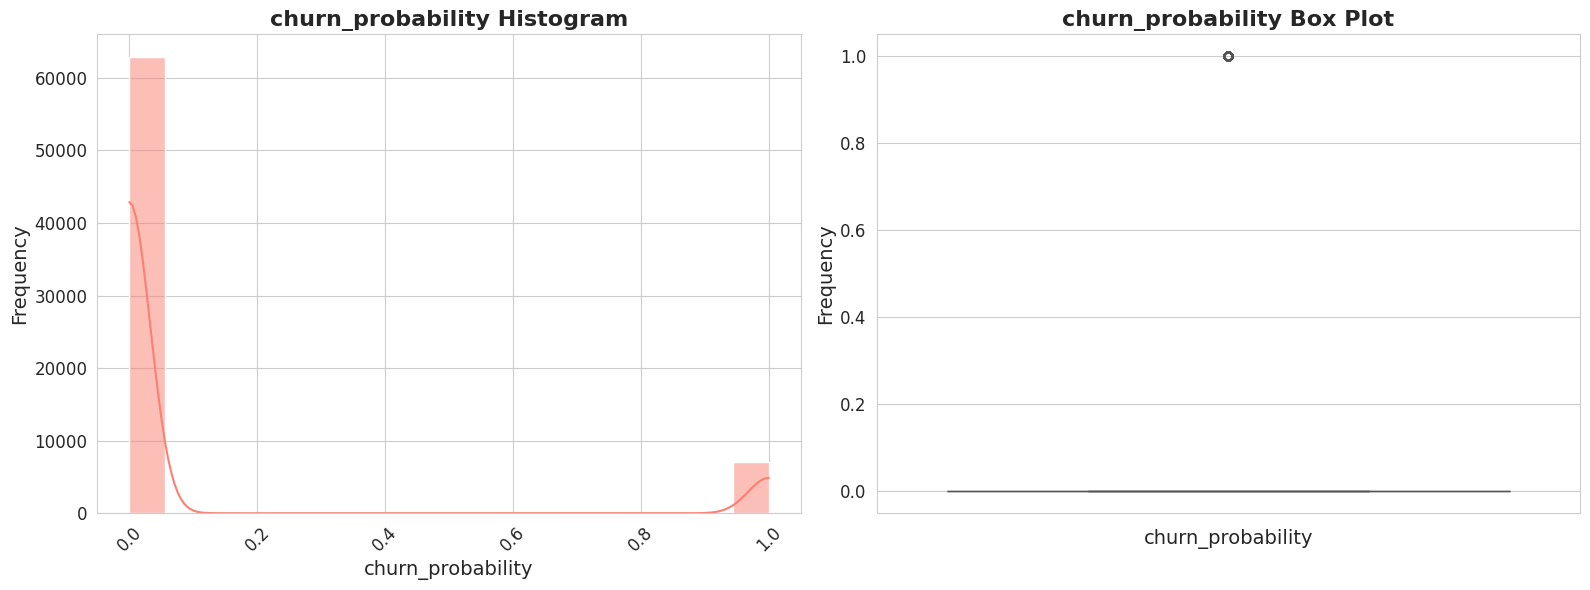

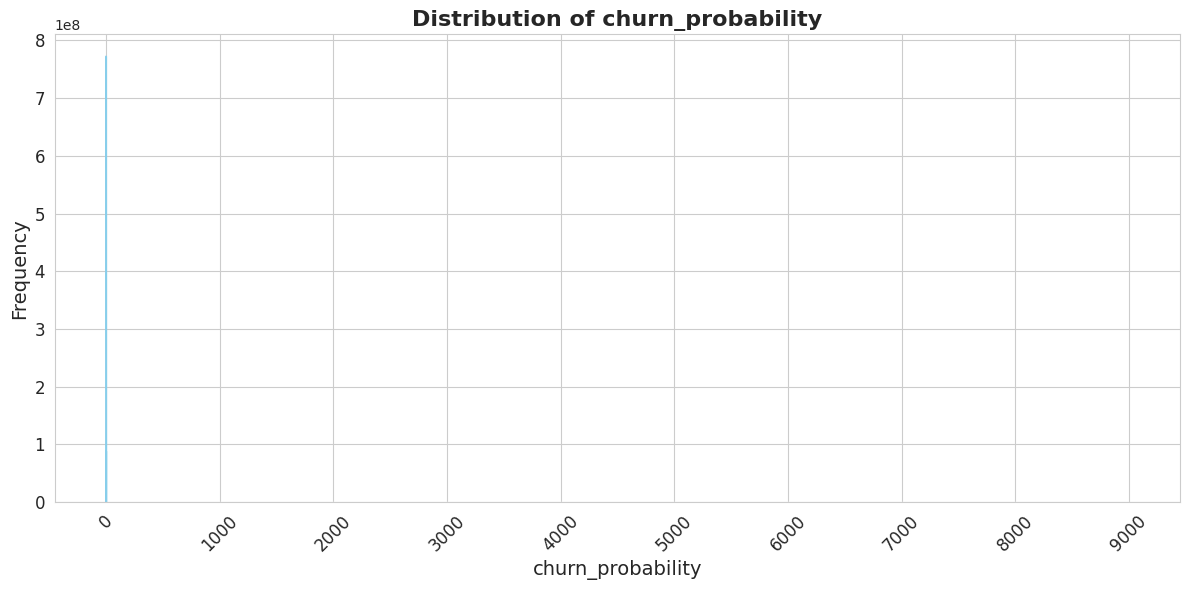

In [36]:
univariate_analysis = UnivariateAnalysis(df_clean_august, 'churn_probability')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 10000, 1000))

### Segmented Bivariate Analysis

In [37]:
def plot_bar_graph(title, month, y_list, data):
    plt.figure(figsize=(15, 10))
    
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)
    
    plt.tight_layout()
    plt.show()


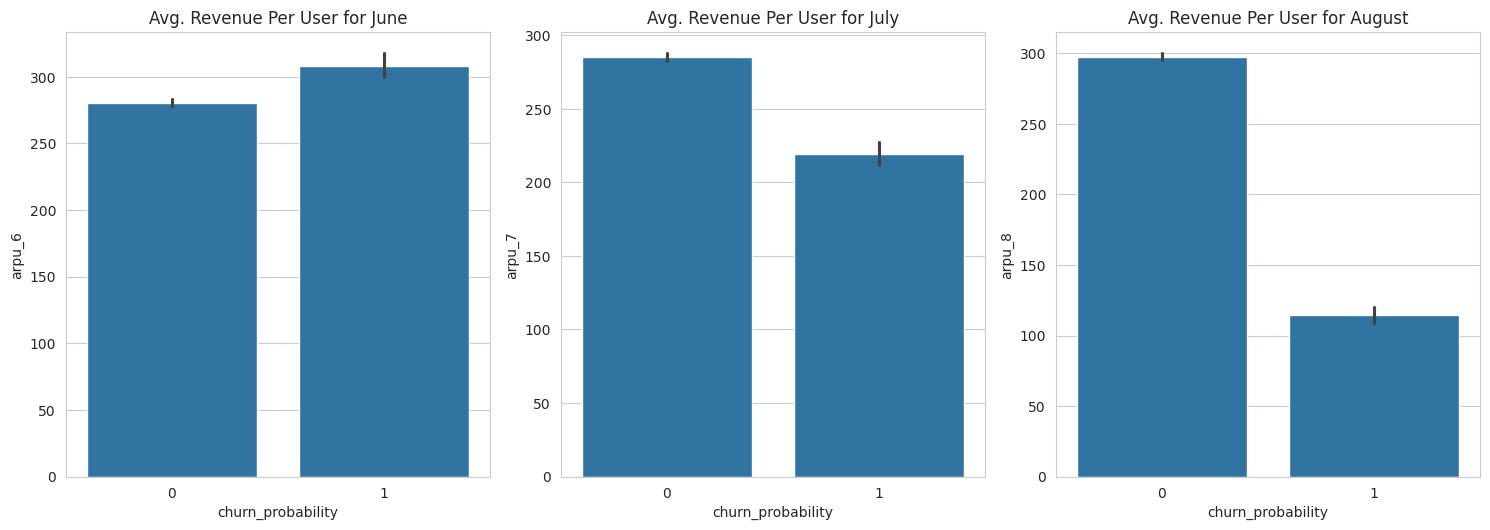

In [38]:
# Visualising Average Revenue per user
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8']
plot_bar_graph('Avg. Revenue Per User', ['June', 'July', 'August'], arpu_cols, df_clean)

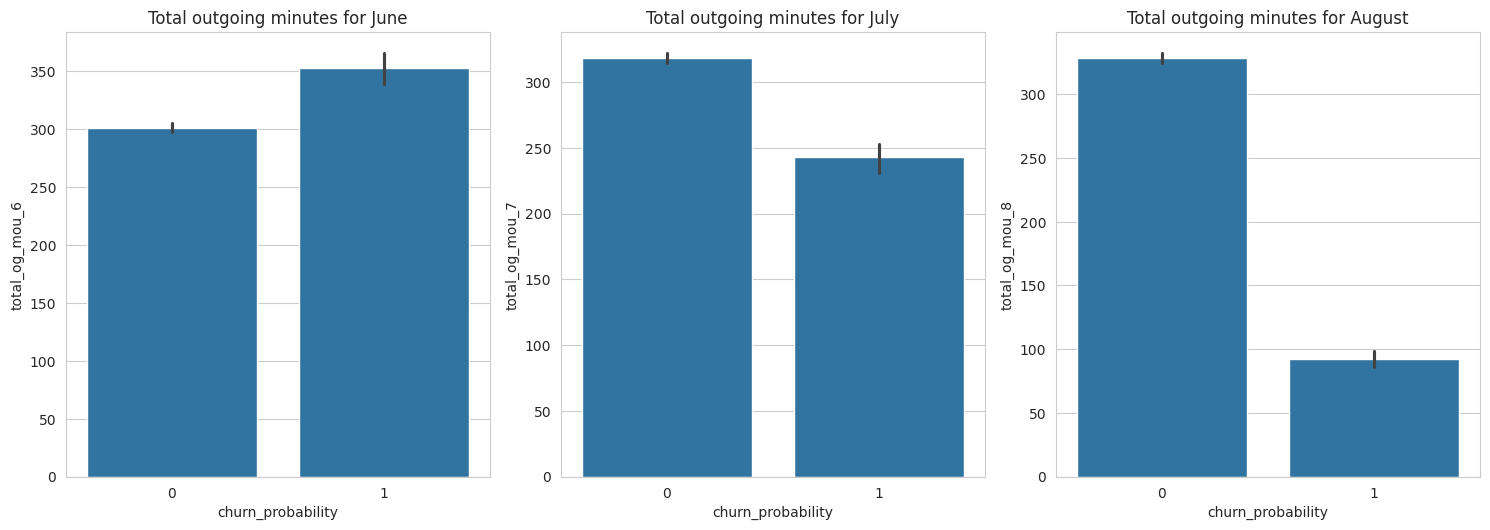

In [39]:
# Visualising Outgoing minutes of usage
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_bar_graph('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, df_clean)

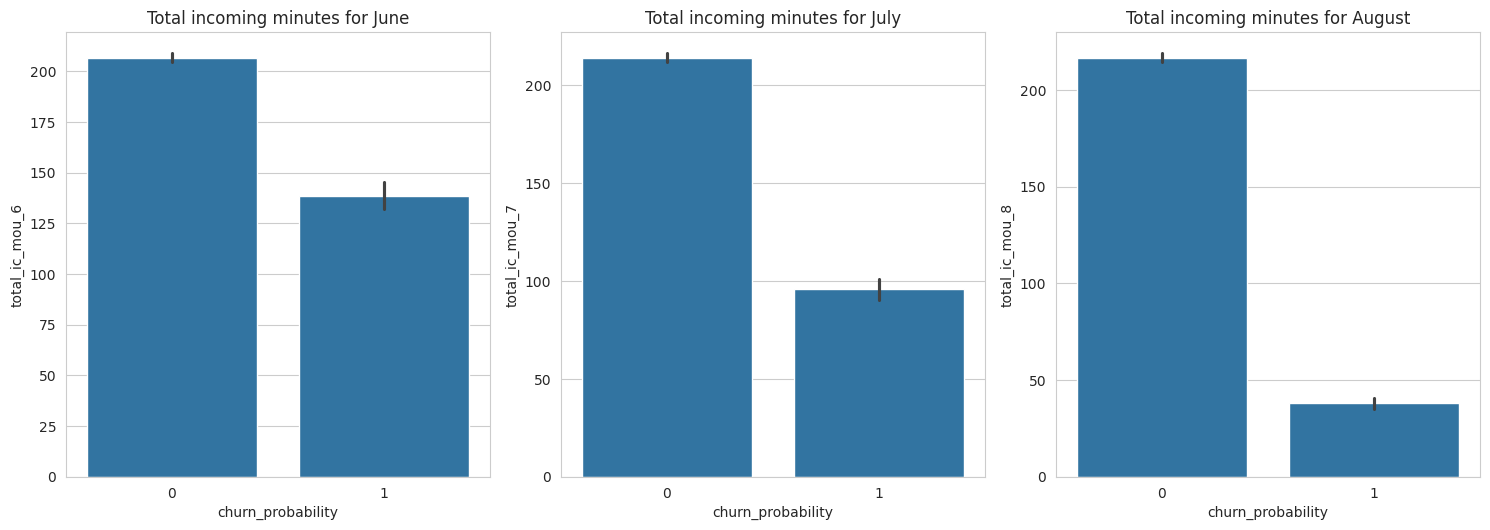

In [40]:
# Visualising incoming minutes of usage
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plot_bar_graph('Total incoming minutes', ['June', 'July', 'August'], total_ic_mou_cols, df_clean)

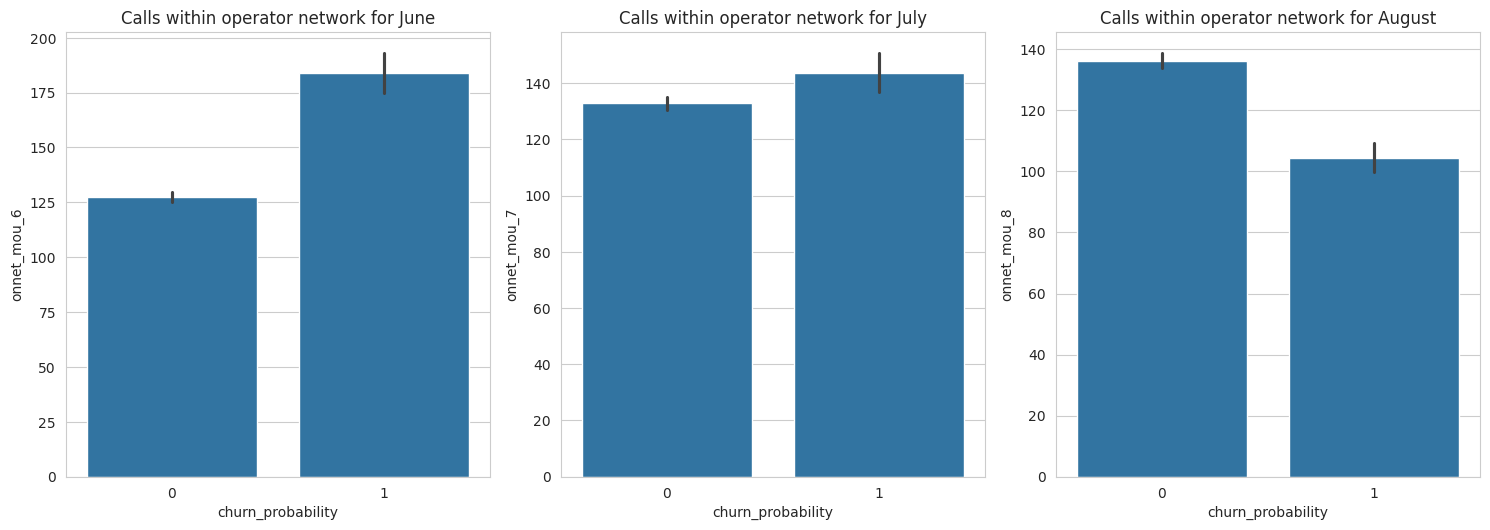

In [41]:
# Visualizing all types of calls within the operator's network.
onnet_mou_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
plot_bar_graph('Calls within operator network', ['June', 'July', 'August'], onnet_mou_cols, df_clean)

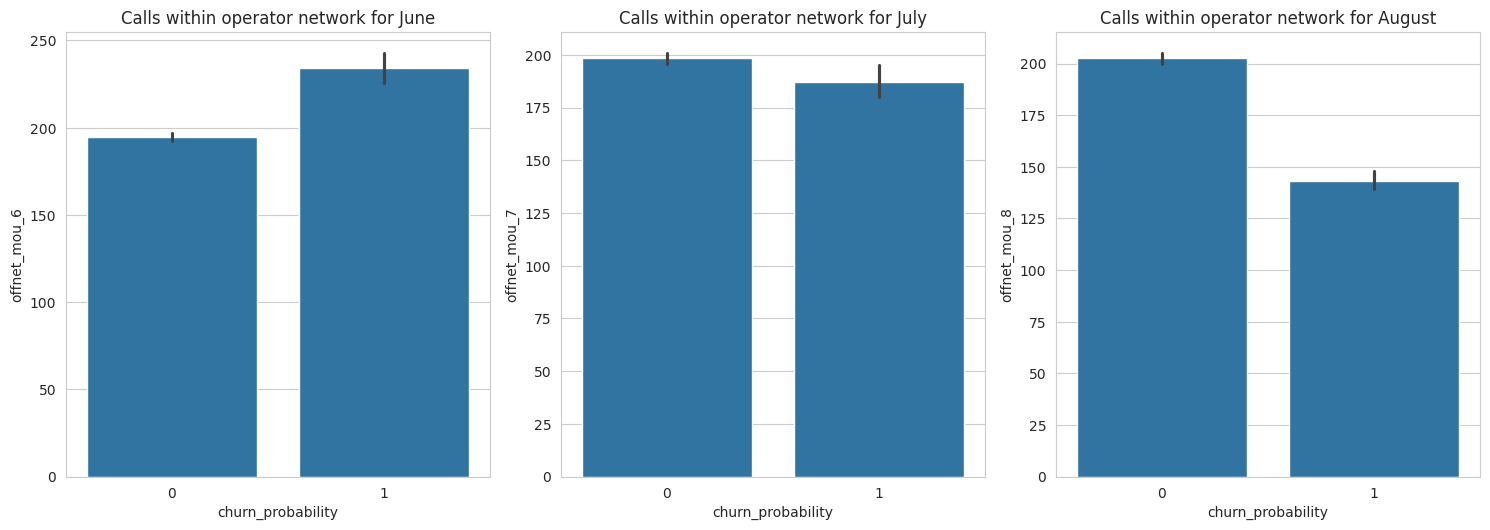

In [42]:
# Visualizing all types of calls within the operator's network.
onnet_mou_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
plot_bar_graph('Calls within operator network', ['June', 'July', 'August'], onnet_mou_cols, df_clean)

In [43]:
# Analysing different metrics by extracting them into columns of similar type
amount_data = df_clean.loc[:, df_clean.columns.str.contains('amt')]
arpu_data = df_clean.loc[:, df_clean.columns.str.contains('arpu')]
data2g = df_clean.loc[:, df_clean.columns.str.contains('2g')]
data3g = df_clean.loc[:, df_clean.columns.str.contains('3g')]
ic_mou_data = df_clean.loc[:, df_clean.columns.str.contains('ic') & df_clean.columns.str.contains('mou')]
net_mou_data = df_clean.loc[:, df_clean.columns.str.contains('net_mou')]
og_mou_data = df_clean.loc[:, df_clean.columns.str.contains('og') & df_clean.columns.str.contains('mou')]
rech_data = df_clean.loc[:, df_clean.columns.str.contains('rech')]
total_data = df_clean.loc[:, df_clean.columns.str.contains('tot')]
others_data = df_clean.loc[:,df_clean.columns.str.contains('other')]

#### Multivariate Analysis

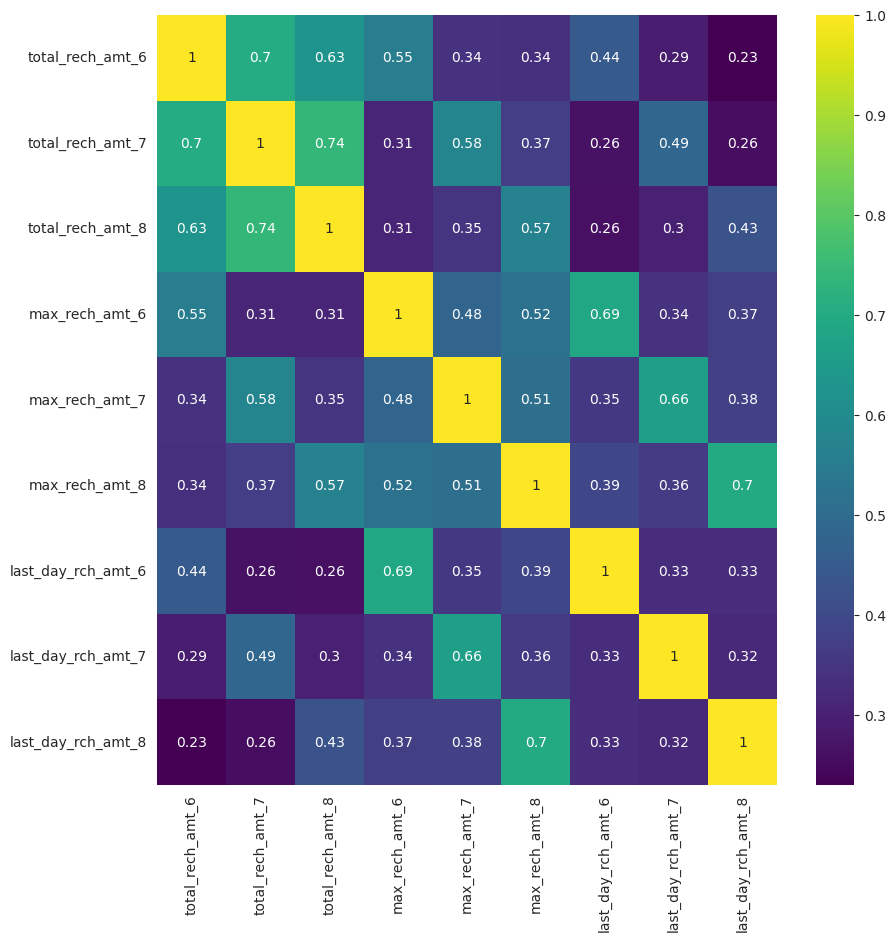

In [44]:
# Amount data
plt.figure(figsize=(10,10))
sns.heatmap(amount_data.corr(), annot=True, cmap='viridis')
plt.show()

### Observation:

 1. A substantial correlation of 74% exists between the total recharge amount in month 7 and month 8.
2. Similarly, a notable correlation of 68% is observed between the maximum recharge amount in month 8 and the last    day's recharge amount in the same month.
3. This suggests that customers who are unlikely to churn tend to recharge higher amounts in month 8.

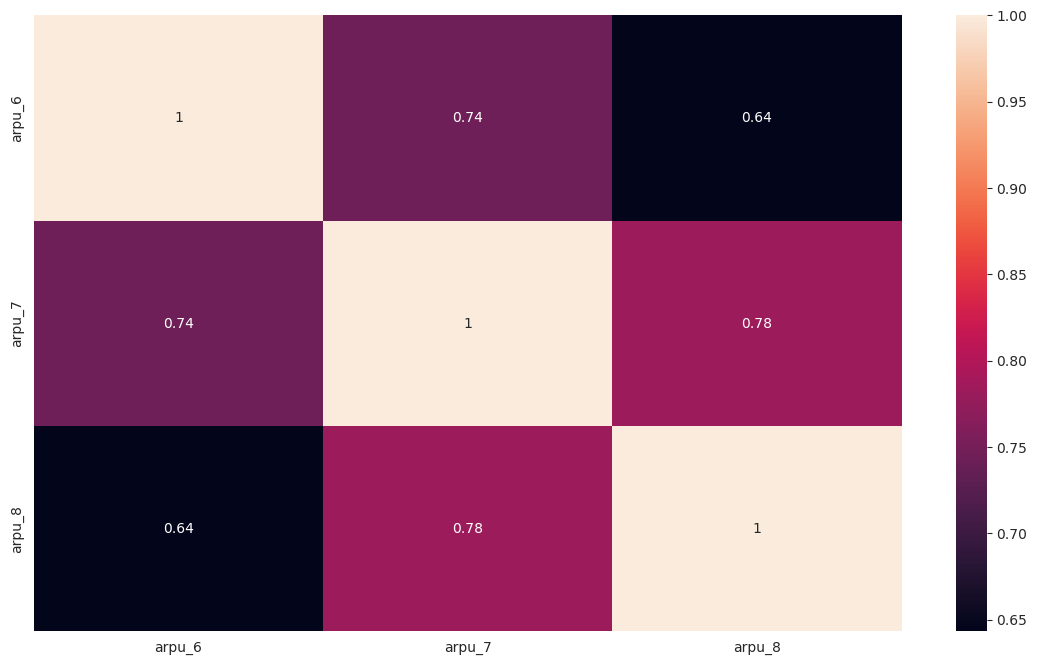

In [45]:
#arpudata
plt.figure(figsize=(14,8))
sns.heatmap(arpu_data.corr(), annot=True)
plt.show()

### Observation:
1. Average Revenue shows increasing correlation over the years

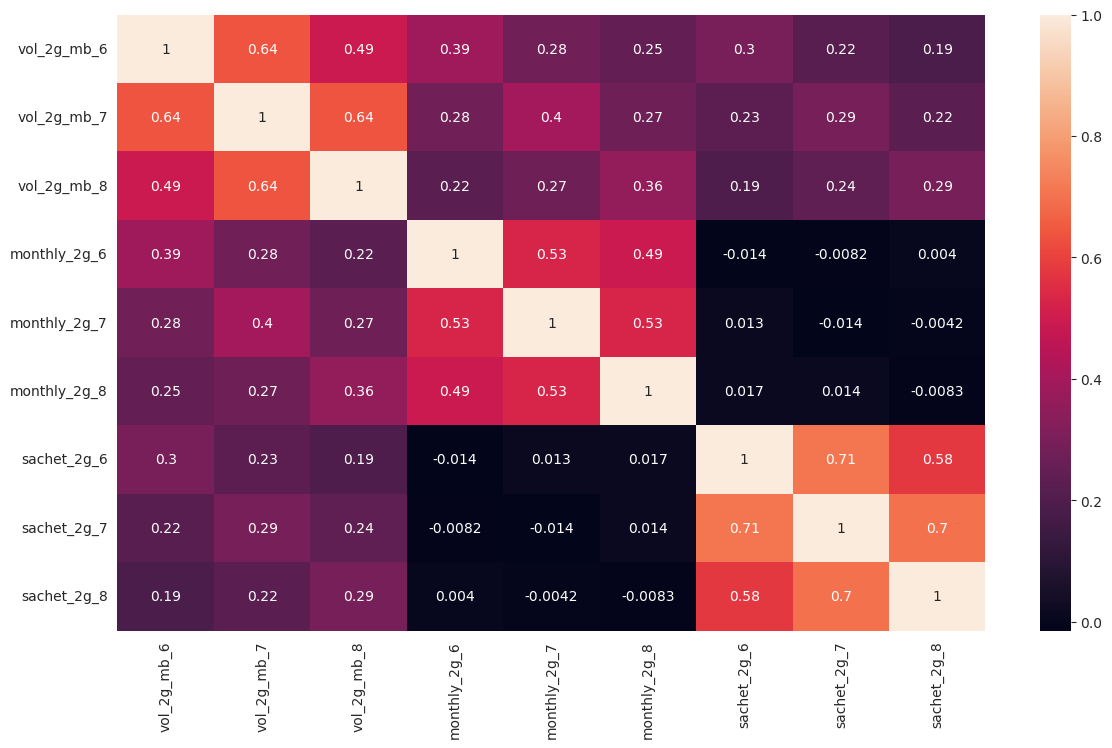

In [46]:
# data2g
plt.figure(figsize=(14,8))
sns.heatmap(data2g.corr(), annot=True)
plt.show()

### Observation:
1. Strong correlation between months 7 and 8

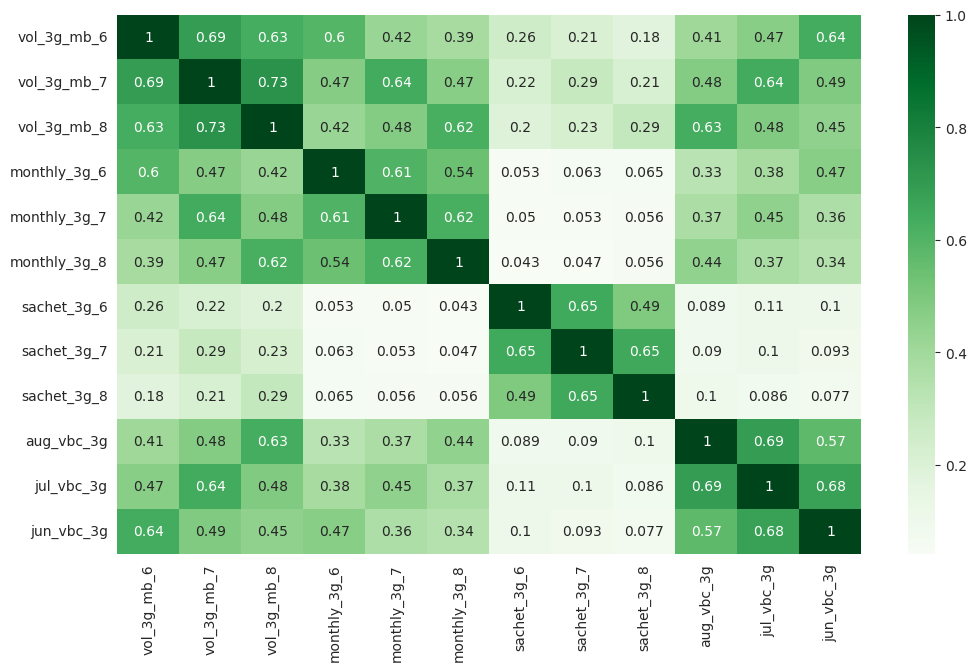

In [47]:
#data3g
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Greens')
plt.show()

### Observation:
1. Strong correlation between recharge quantities months 7 and 8

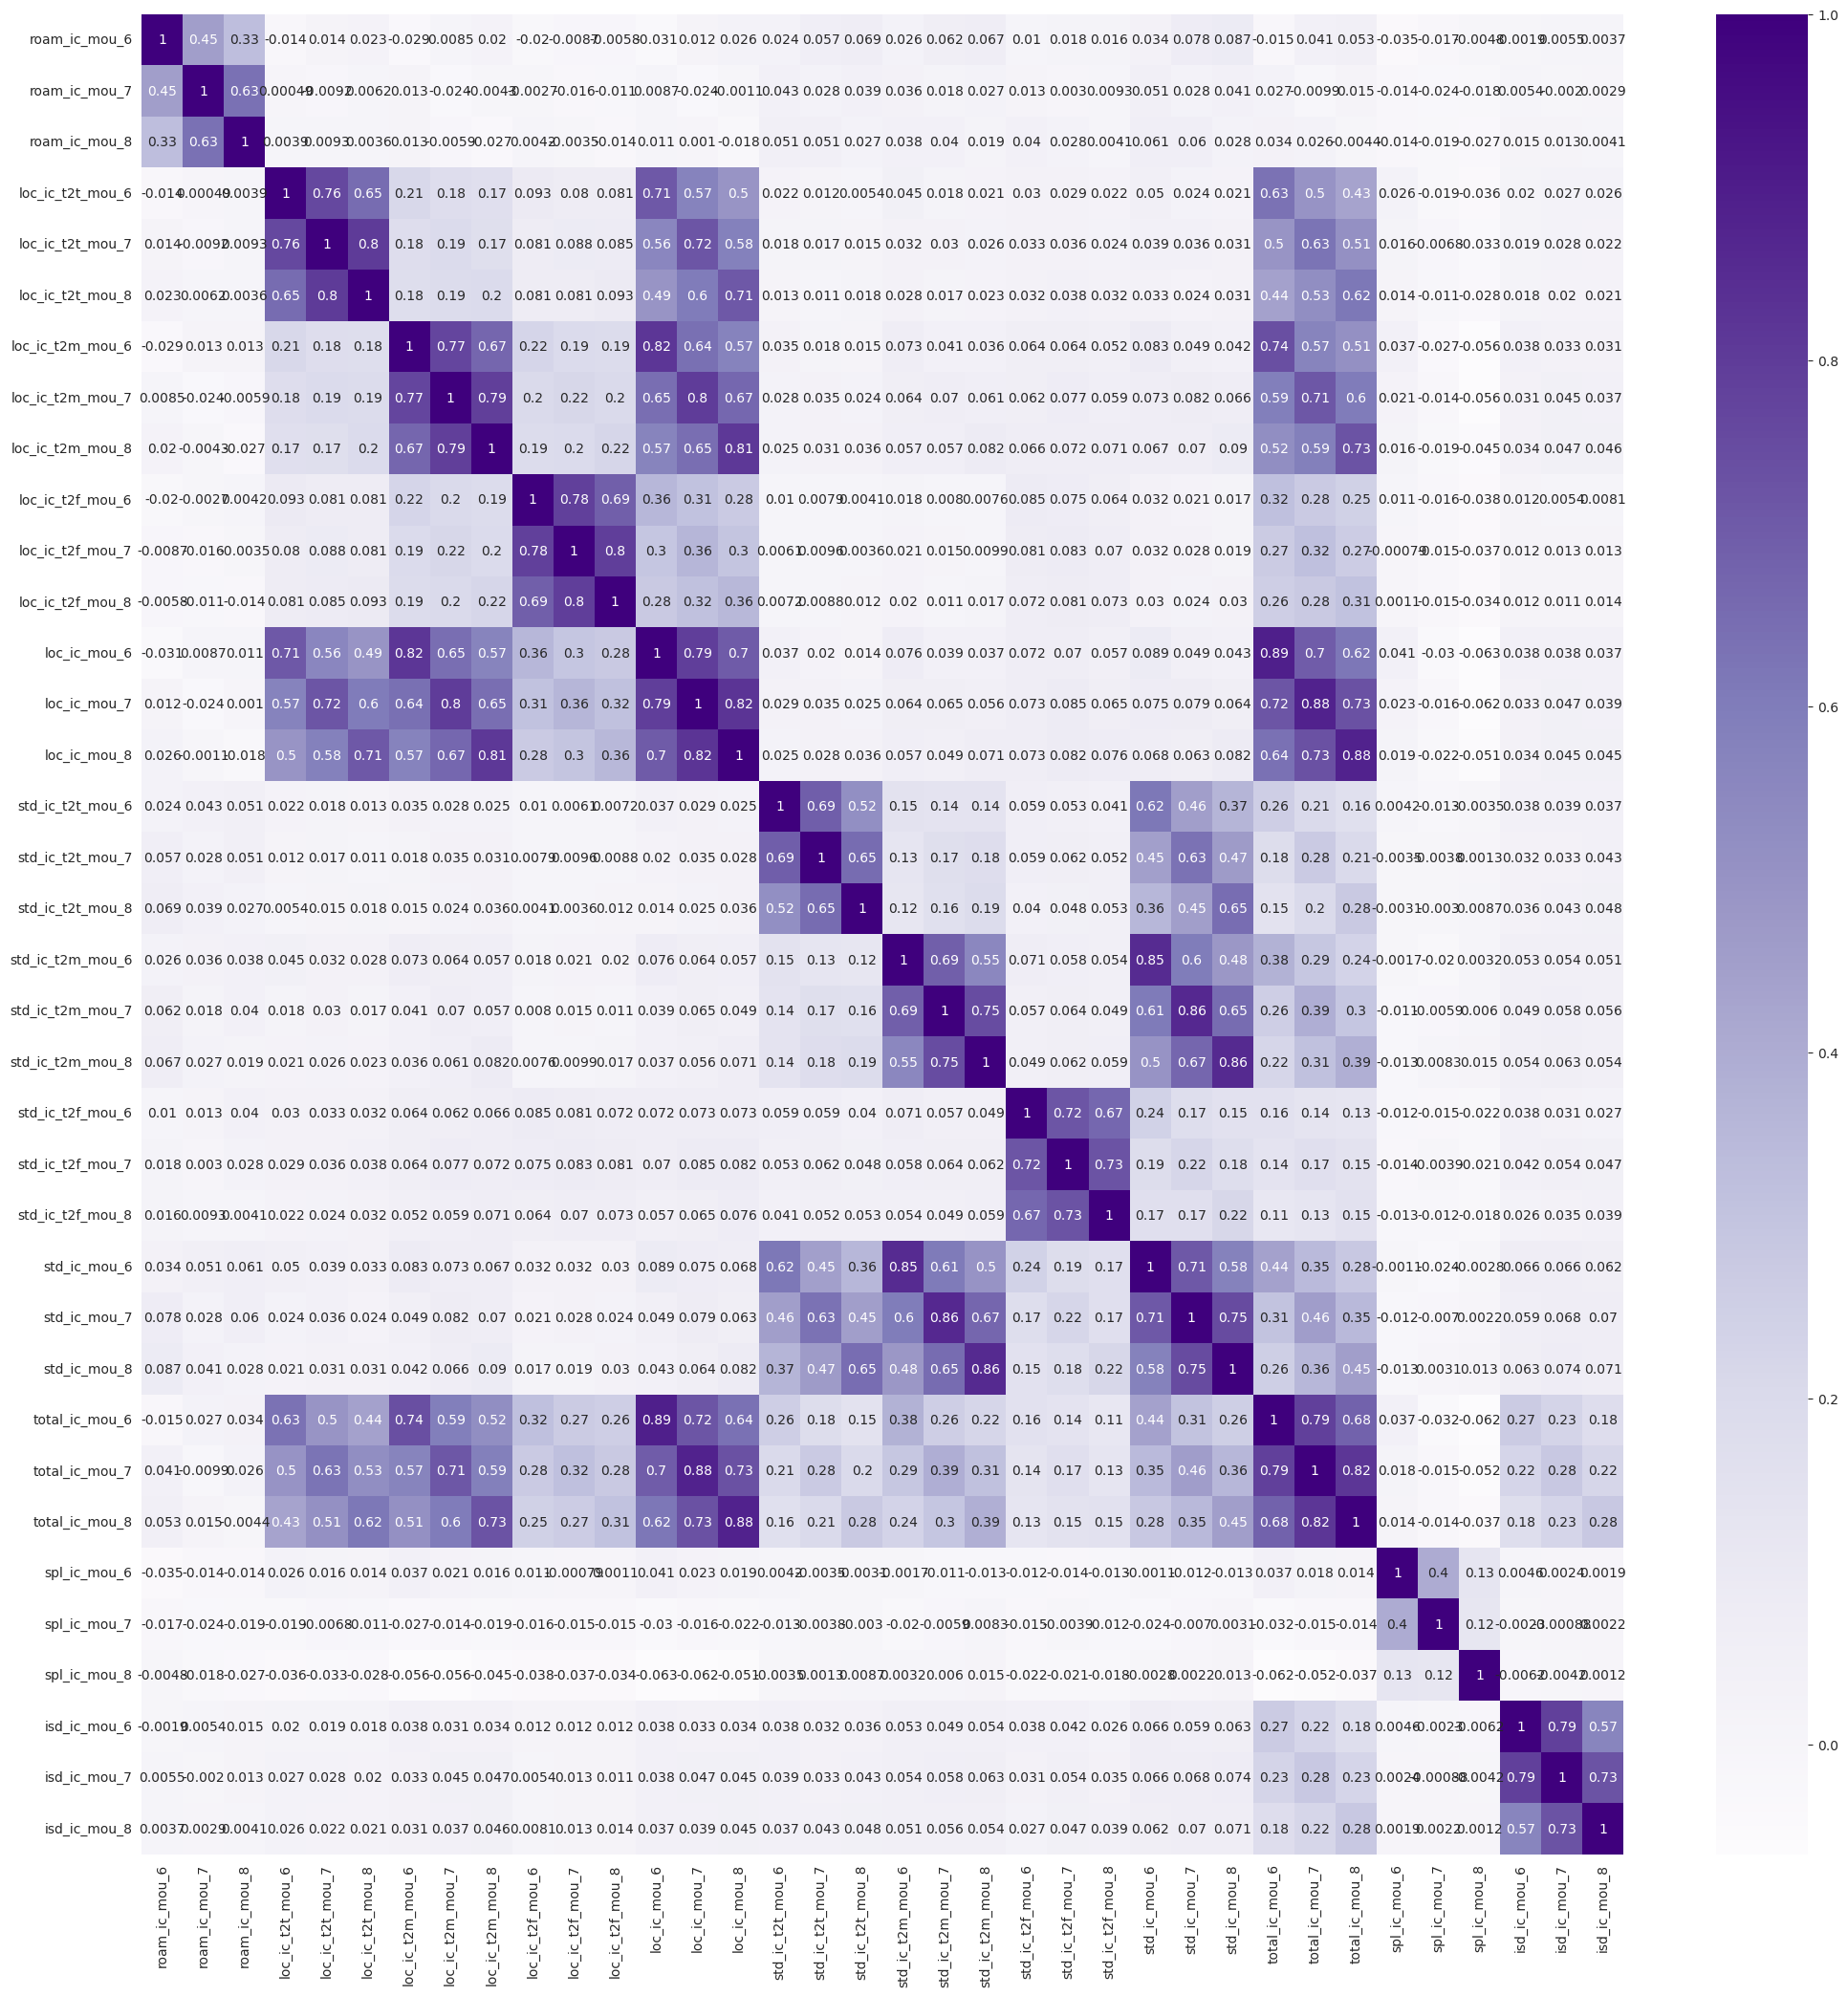

In [48]:
#ic_mou_data
plt.figure(figsize=(25, 25))
sns.heatmap(ic_mou_data.corr(), annot=True, cmap='Purples')
plt.show()

#### Observations:

The following variables or features exhibit a remarkably high correlation:

 1. total_ic_mou_6 and loc_ic_mou_6
 2. total_ic_mou_7 and loc_ic_mou_7
 3. total_ic_mou_8 and loc_ic_mou_8
 4. std_ic_mou_6 and std_ic_t2f_mou_6
 5. std_ic_mou_7 and std_ic_t2f_mou_7
 6. std_ic_mou_8 and std_ic_t2f_mou_8

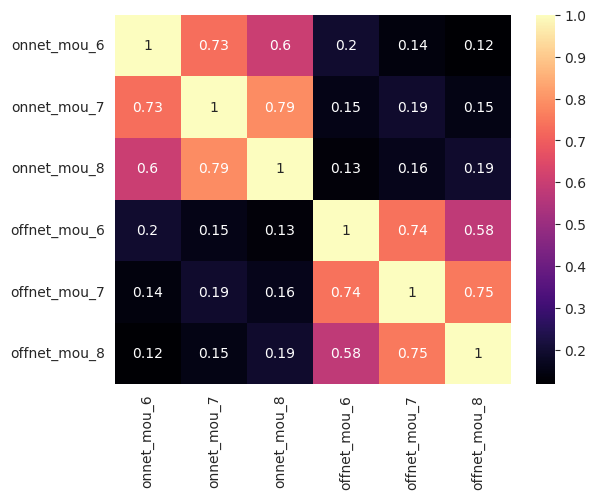

In [49]:
#net_mou_data
sns.heatmap(net_mou_data.corr(), annot=True, cmap='magma')
plt.show()

#### Observations:

 1. There is no correlation between the usage minutes for on-net and off-net calls.
 2. However, a significant correlation is observed between the on-net and off-net usage minutes in both months 7 and 8.

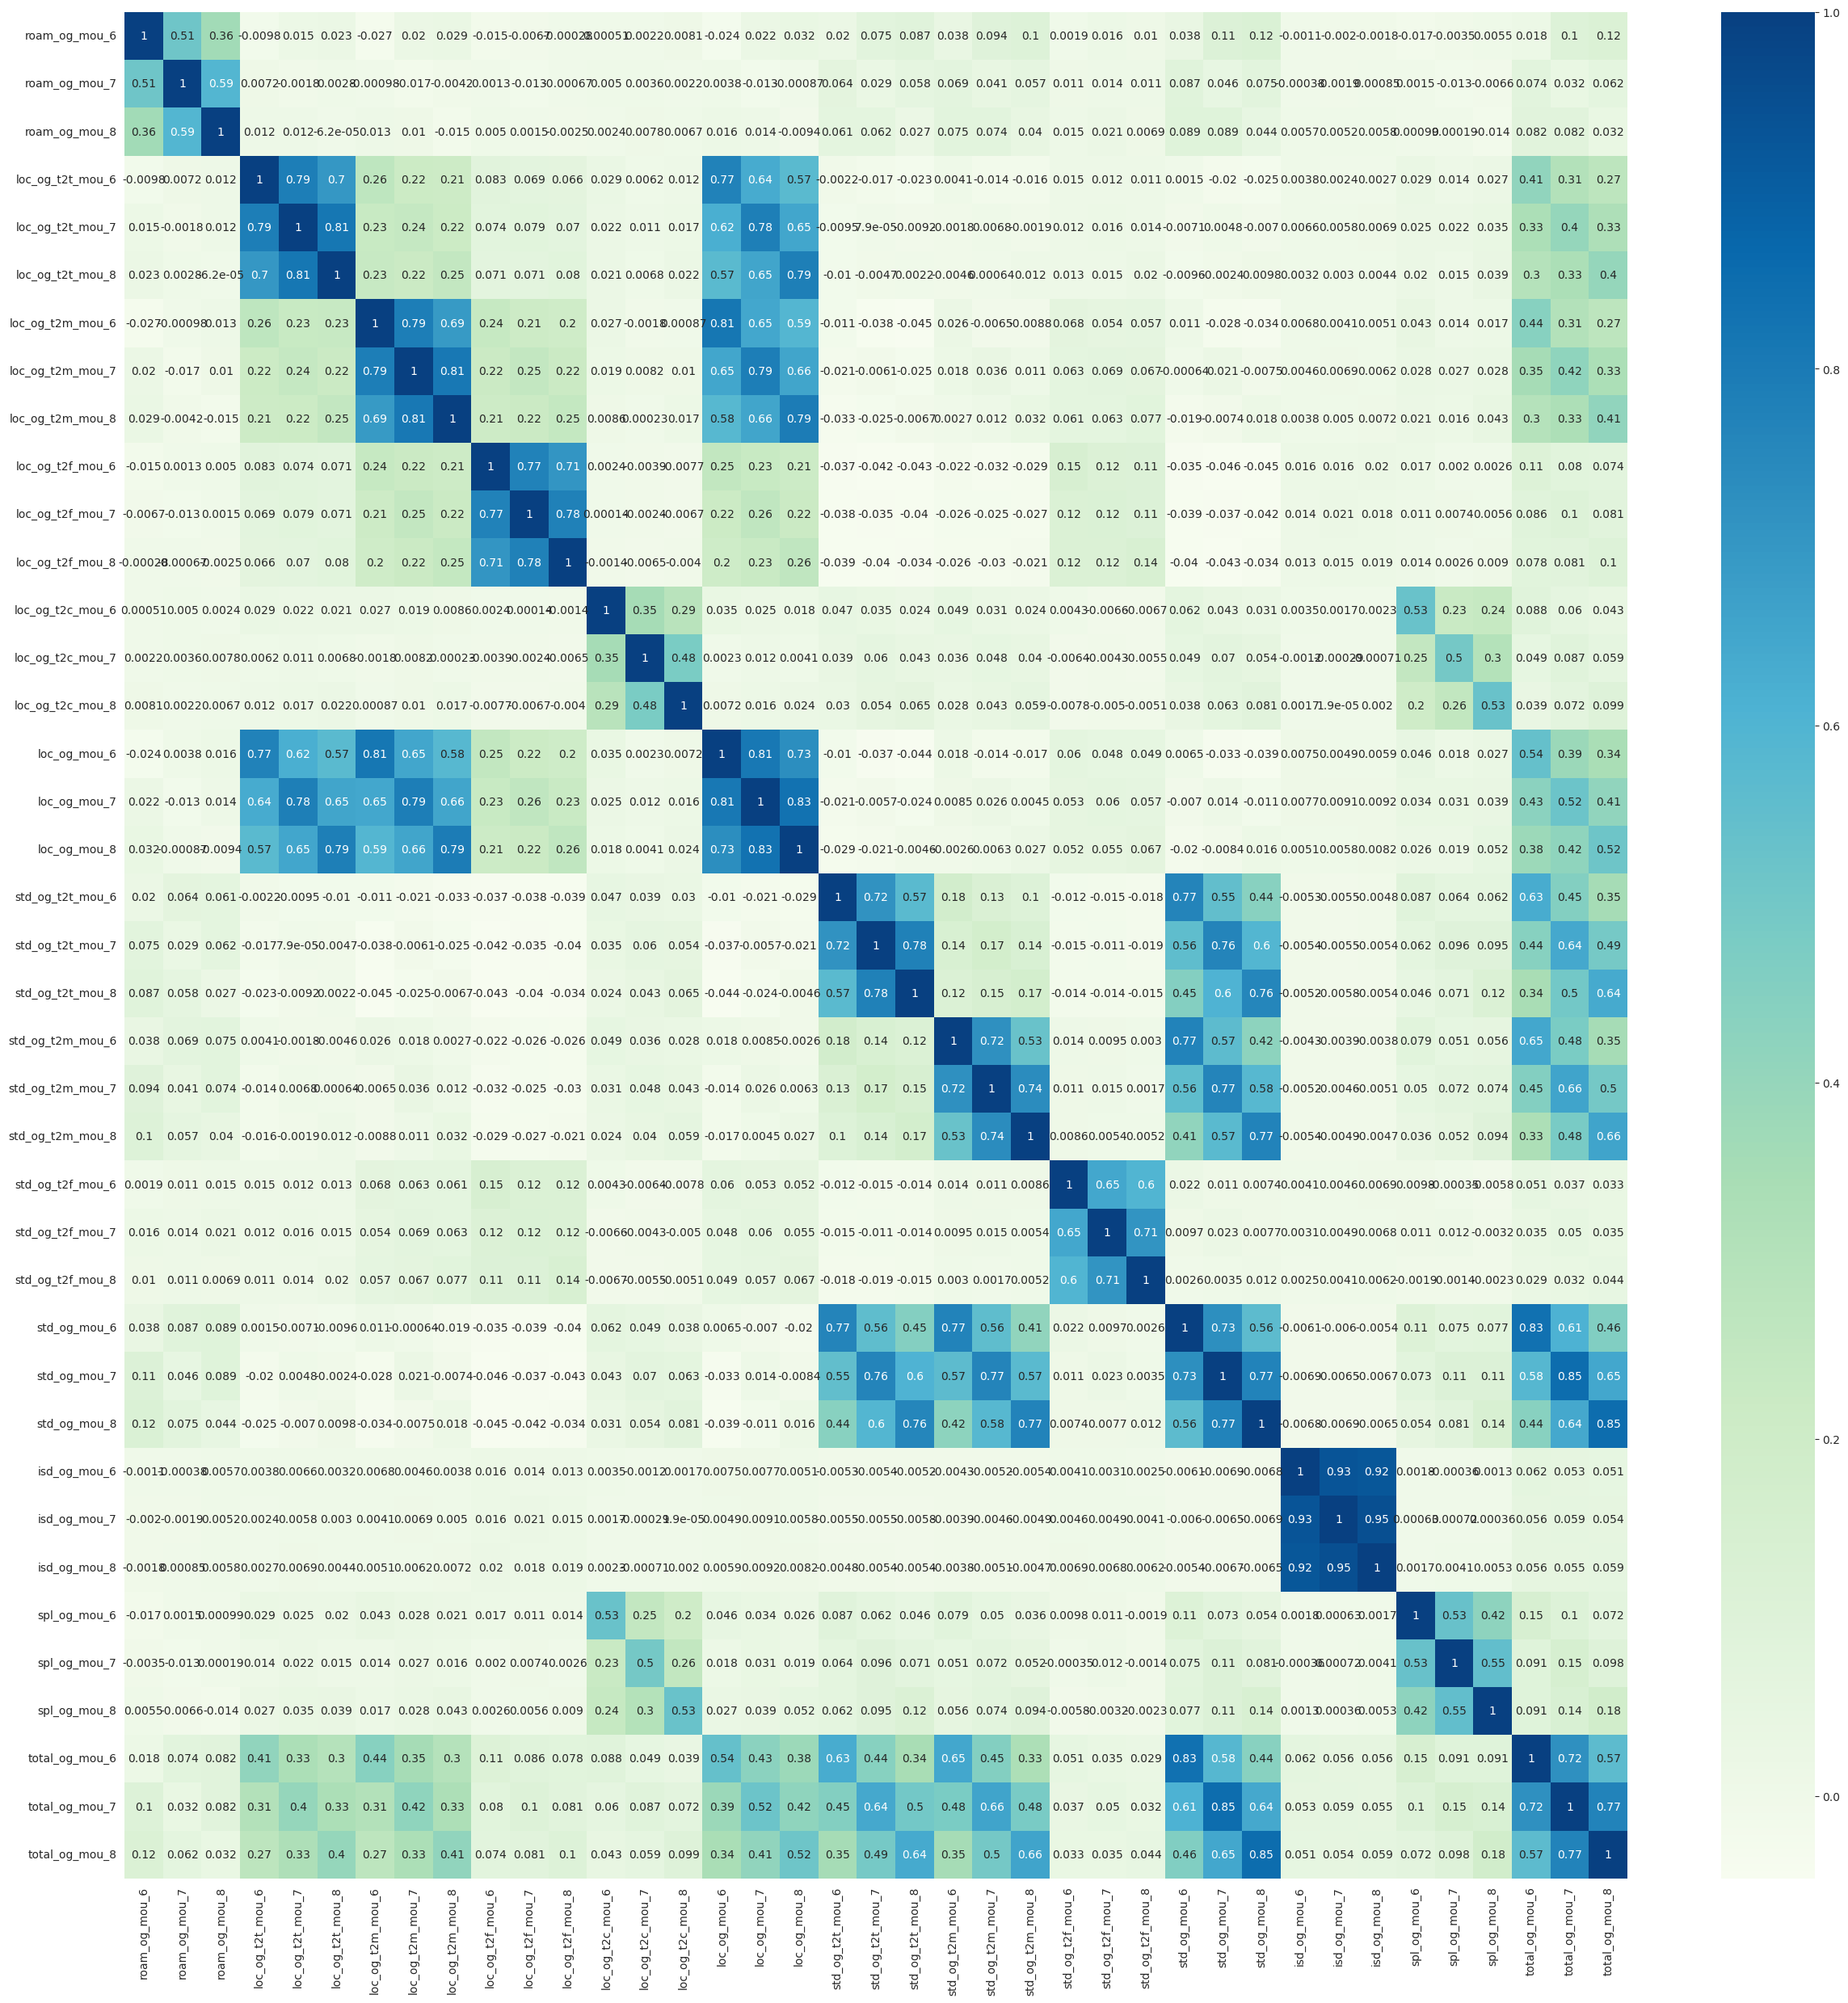

In [50]:
#og_mou_data
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_data.corr(), annot=True, cmap='GnBu')
plt.show()

Observations:

There exists a very high correlation between the following variables/features:

 1. isd_og_mou_7 and isd_og_mou_6
 2. isd_og_mou_8 and isd_og_mou_6
 3. isd_og_mou_8 and isd_og_mou_7
 4. total_og_mou_6 and std_og_mou_6
 5. total_og_mou_7 and std_og_mou_7
 6. total_og_mou_8 and std_og_mou_8

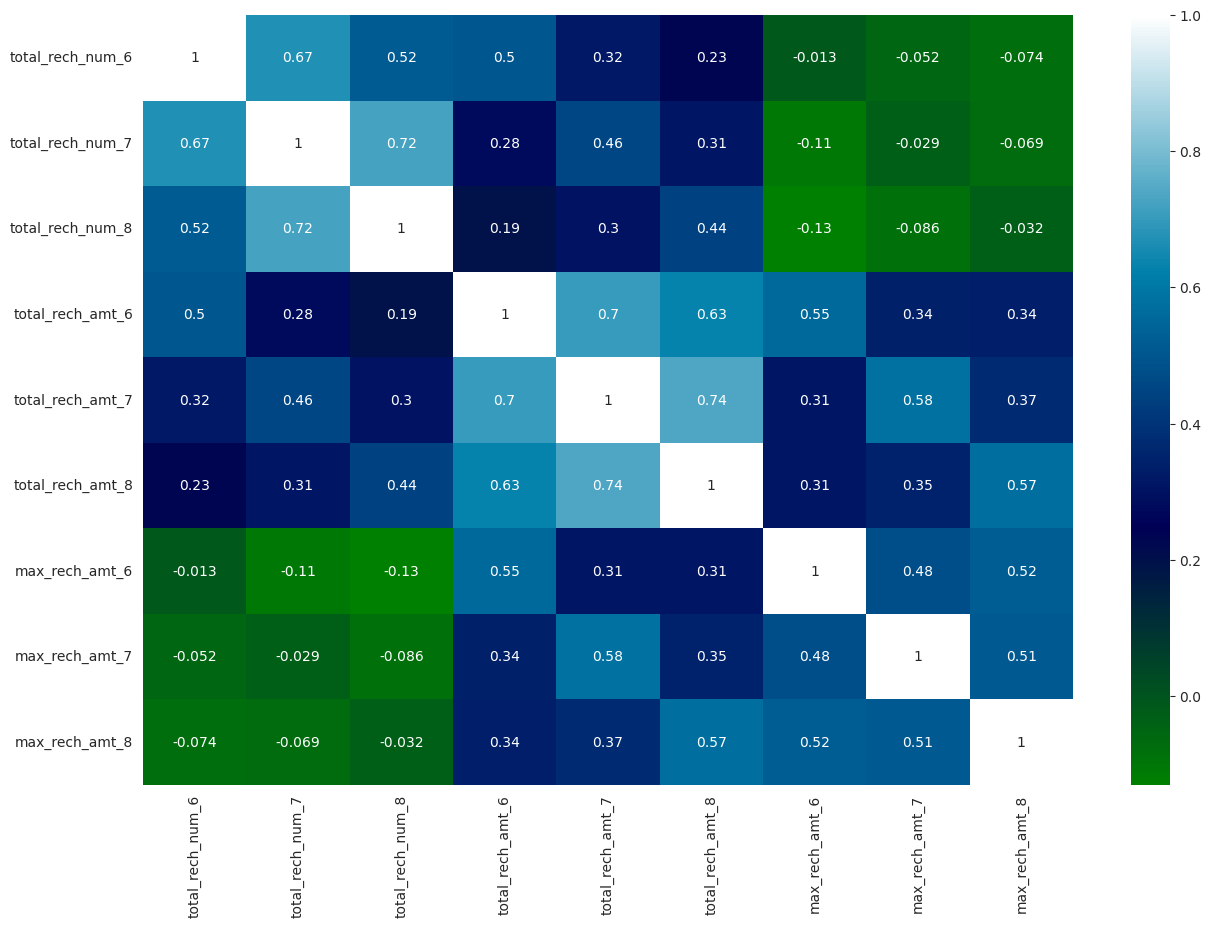

In [51]:
#rech_data
plt.figure(figsize=(15,10))
sns.heatmap(rech_data.corr(), annot=True, cmap='ocean')
plt.show()

#### Observations:

 1. There is a notable correlation between the average recharge amount and the recharge amount for both months 6 and 7.
 2. A significant correlation of 76% exists between the total recharge for month 7 and the recharge for month 8.
 3. Any factor correlated with month 8 is likely correlated with churn prediction.

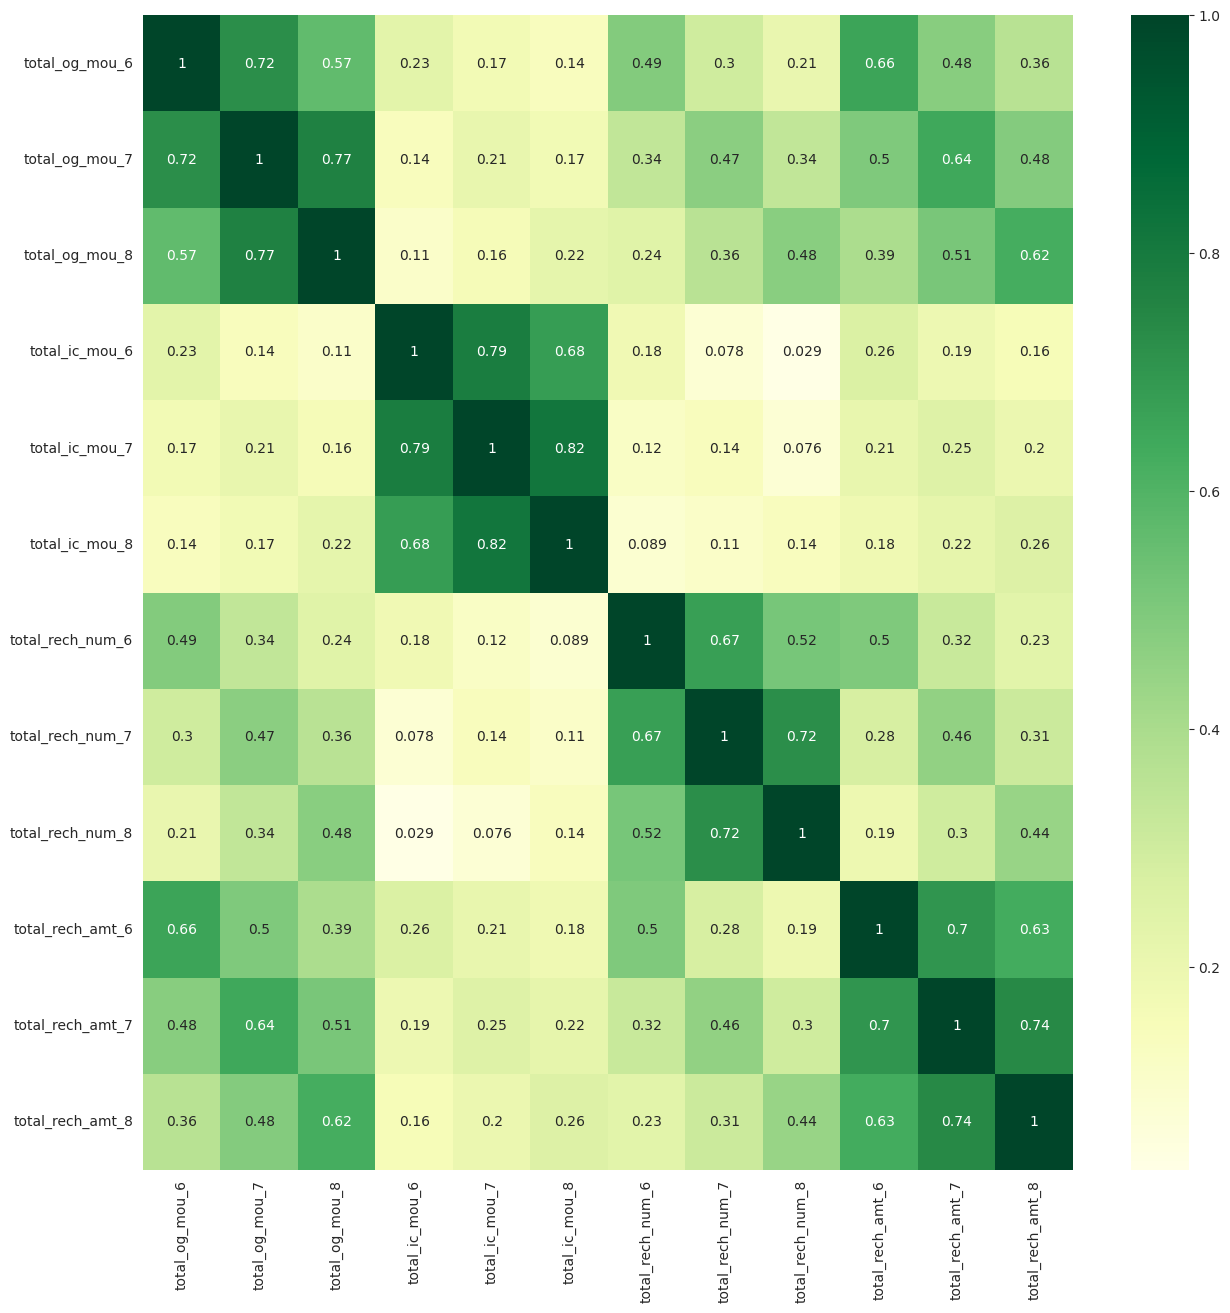

In [52]:
#total_data
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot=True, cmap='YlGn')
plt.show()

### Observations:

 1. There exists a remarkably high correlation between the incoming (82%) and outgoing minutes (77%) of usage in months 7 and 8.
 2. Heavy usage suggests that customers are less likely to churn.

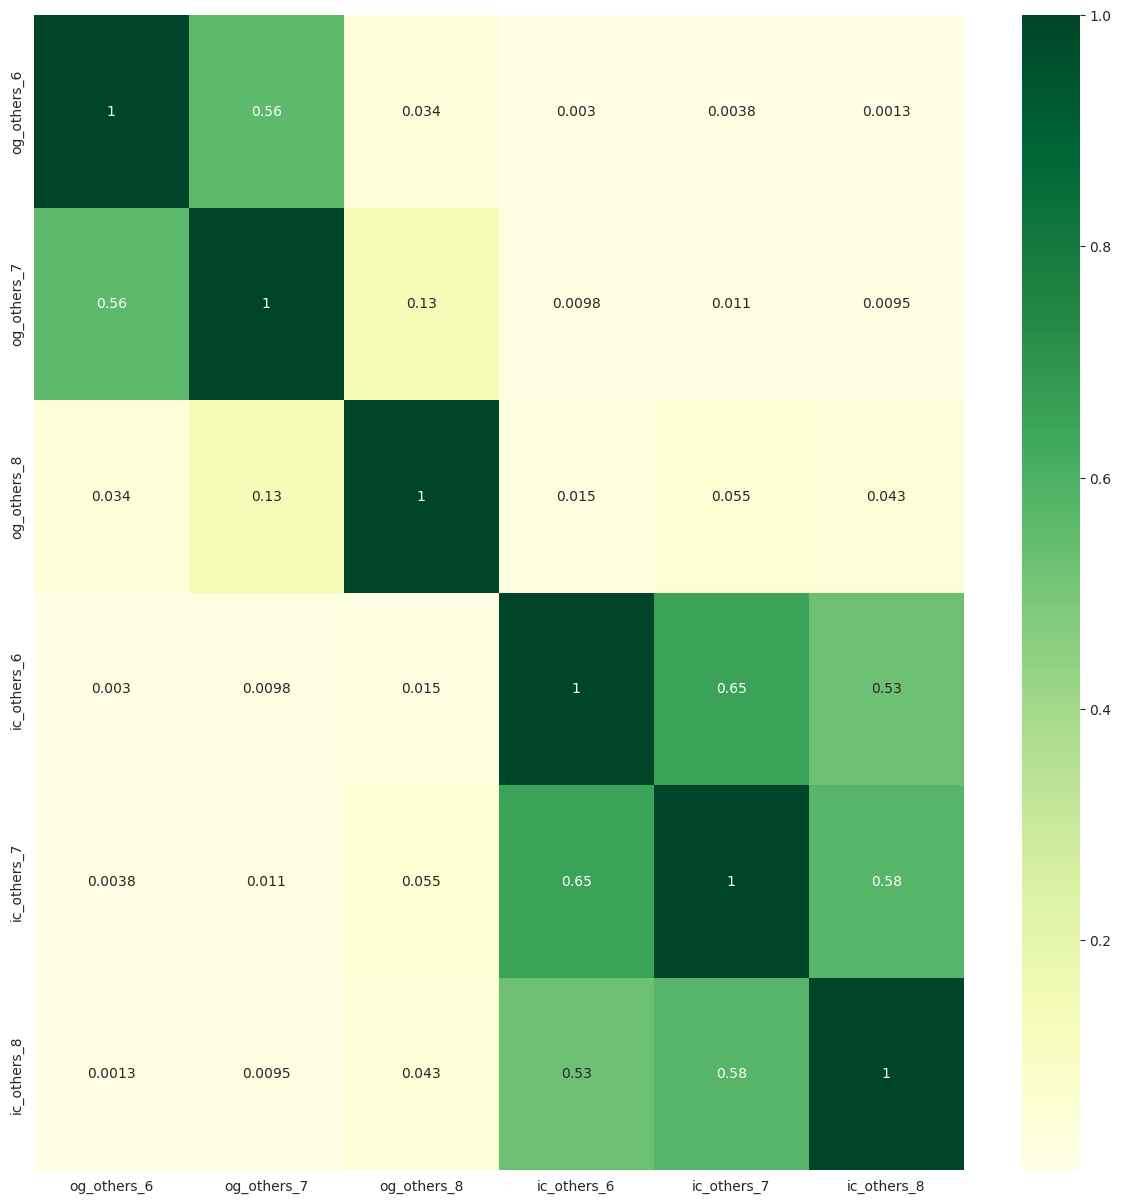

In [53]:
# others_data
plt.figure(figsize=(15,15))
sns.heatmap(others_data.corr(), annot=True, cmap='YlGn')
plt.show()

#### Observations
 1. Strong correlation between others incoming calls between the months of June and July.
 2. Strong correlation between others outgoing calls between the months of June and July.

#### Model Building and Evaluation

In [54]:
# Partitioning the dataset into the feature variable 'X' and the response variable 'y'.
X = df_clean.drop(['churn_probability'], axis=1)
y = df_clean['churn_probability']

In [55]:
X.shape

(69999, 124)

In [56]:
y.shape

(69999,)

In [57]:
# Train test split - 80% training data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=100)

In [58]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (48999, 124)
y_train Shape: (48999,)
X_val Shape: (21000, 124)
y_val Shape: (21000,)


In [59]:
y_train.value_counts()

churn_probability
0    43966
1     5033
Name: count, dtype: int64

#### Handling Data Imbalance using Synthetic Minority Over-sampling Technique (SMOTE)

In [60]:
smt = SMOTE(random_state=2)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

In [61]:
X_train_smote.shape

(87932, 124)

In [62]:
y_train_smote.shape

(87932,)

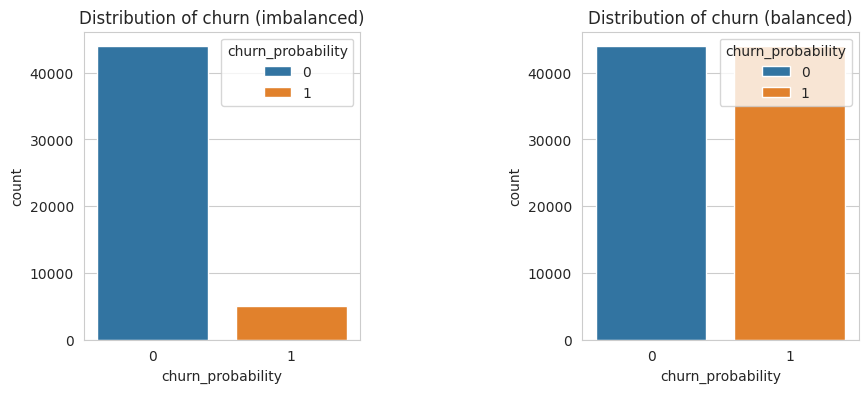

In [63]:
# Checking the distribution on our target variable 'y_train' before and after SMOTE
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Distribution of churn (imbalanced)")
sns.countplot(x=y_train, hue=y_train)

plt.subplot(1,2,2)
plt.title("Distribution of churn (balanced)")
sns.countplot(x=y_train_smote, hue=y_train_smote)

plt.subplots_adjust(wspace=0.8)
plt.show()

### Feature Scaling using SandardScaler - Training Data

In [64]:
# Use SandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns = X_train_smote.columns, index = X_train_smote.index)

# Only Transform validation set
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns, index = X_val.index)

In [65]:
X_train_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.427675 -0.411520  0.073950    -0.475852    -0.449595    -0.463375   
1 -0.545974 -0.657146 -0.297161    -0.324544    -0.300168    -0.193994   
2  1.348704  1.124739  1.116067     1.045742     1.389594     1.172876   
3 -0.563154 -0.509902 -0.011698    -0.448469    -0.415820    -0.310186   
4 -0.634765 -0.305194 -0.370177    -0.456474    -0.424155    -0.467741   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.575183     -0.530876     -0.589741      -0.100622      -0.147354   
1     -0.562401     -0.545281     -0.504167      -0.128590      -0.147354   
2      0.907983      1.228620      1.239678      -0.182351      -0.147354   
3     -0.550605     -0.432444      0.123163      -0.182351      -0.147354   
4     -0.274792     -0.071172     -0.237907      -0.182351      -0.147354   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.172492      -0.084204      -0.220049      -0.208174   
1      -0.172492      -0.045068      -0.220049      -0.208174   
2      -0.172492      -0.226737      -0.220049      -0.208174   
3      -0.172492      -0.226737      -0.220049      -0.208174   
4      -0.172492      -0.226737      -0.220049      -0.208174   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.297027         -0.294272         -0.317256         -0.502136   
1         -0.018617          0.069153          0.290719         -0.447864   
2          1.606935          1.124570          1.351494          2.992698   
3         -0.225413         -0.202688         -0.088885         -0.398513   
4         -0.245093         -0.222279         -0.327111          0.282860   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.478423         -0.490926         -0.284137         -0.287779   
1         -0.473992         -0.570970         -0.177855         -0.287779   
2          3.355183          3.432770          0.016351         -0.203750   
3         -0.217763          0.370826         -0.284137         -0.287779   
4          0.643828          0.286609         -0.284137          0.692240   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.299386          1.269048         -0.177834         -0.254427   
1         -0.155297         -0.244090         -0.177834         -0.254427   
2         -0.012230         -0.244090         -0.177834         -0.105596   
3          0.271860         -0.244090         -0.177834         -0.254427   
4         -0.299386         -0.244090         -0.177834         -0.254427   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.515624     -0.493704     -0.517269         -0.370029   
1     -0.306020     -0.262269     -0.194618         -0.370029   
2      2.890766      2.758656      2.984360          0.460944   
3     -0.405825     -0.275883      0.195601         -0.370029   
4      0.017190      0.290797     -0.031192         -0.370029   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.342054         -0.343892         -0.393564         -0.331783   
1         -0.347895         -0.343892         -0.377991         -0.358734   
2          1.048893          0.693321         -0.339429         -0.070696   
3         -0.347895         -0.283798         -0.376508         -0.337642   
4         -0.347895         -0.343892         -0.393564         -0.371002   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.372543         -0.134643         -0.126953         -0.142638   
1         -0.285636         -0.134643         -0.126953         -0.142638   
2         -0.286362          0.014267          0.069462         -0.142638   
3         -0.002407         -0.134643         -0.126953         -0.142638   
4         -0.372543          0.296183          0.575931          0.129891   



### Model 1 : Logistic Regression with Recursive Feature Elimination (RFE)

In [66]:
# Select top 20 features using RFE
logreg = LogisticRegression(max_iter=100, tol=0.001, solver='sag')
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_scaled, y_train_smote)

In [67]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 17),
 ('arpu_7', False, 3),
 ('arpu_8', False, 33),
 ('onnet_mou_6', False, 30),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 74),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 60),
 ('roam_ic_mou_7', False, 42),
 ('roam_ic_mou_8', False, 89),
 ('roam_og_mou_6', False, 61),
 ('roam_og_mou_7', False, 80),
 ('roam_og_mou_8', False, 29),
 ('loc_og_t2t_mou_6', False, 52),
 ('loc_og_t2t_mou_7', False, 16),
 ('loc_og_t2t_mou_8', False, 70),
 ('loc_og_t2m_mou_6', False, 78),
 ('loc_og_t2m_mou_7', False, 100),
 ('loc_og_t2m_mou_8', False, 43),
 ('loc_og_t2f_mou_6', False, 75),
 ('loc_og_t2f_mou_7', False, 76),
 ('loc_og_t2f_mou_8', False, 104),
 ('loc_og_t2c_mou_6', False, 73),
 ('loc_og_t2c_mou_7', False, 101),
 ('loc_og_t2c_mou_8', False, 63),
 ('loc_og_mou_6', False, 95),
 ('loc_og_mou_7', False, 64),
 ('loc_og_mou_8', False, 28),
 ('std_og_t2t_mou_6', False, 45),
 ('std_og_t2t_mou_7', False, 55),
 ('st

In [68]:
# Selected features using RFE
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon'],
      dtype='object')

In [69]:
X_train_scaled_final = X_train_scaled[selected_features]
logreg.fit(X_train_scaled_final, y_train_smote)

LogisticRegression(solver='sag', tol=0.001)

In [70]:
y_train_smote_pred = logreg.predict(X_train_scaled_final)

In [72]:
def calculate_classification_metrics(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [73]:
# Calculate metrics on the training set
calculate_classification_metrics(y_train_smote, y_train_smote_pred)

Confusion Matrix

[[36955  7011]
 [ 6221 37745]]


Metric   Value
0             Accuracy  0.8495
1          Sensitivity  0.8585
2          Specificity  0.8405
3            Precision  0.8434
4  False Positive Rate  0.1595
5   True Positive Rate  0.8585

In [74]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [75]:
# Retain only the selected feature from the final model
X_val_scaled_final = X_val_scaled[selected_features]
X_val_scaled_final.head()

onnet_mou_7  onnet_mou_8  offnet_mou_7  offnet_mou_8  std_og_t2m_mou_8  \
3425      1.286896    -0.467741      2.031991     -0.642237         -0.372543   
33067     0.482686    -0.365999      0.679702     -0.279577         -0.372543   
52420    -0.363601    -0.467741     -0.605109     -0.644810         -0.372543   
5220     -0.454784    -0.467741     -0.607446     -0.648141         -0.372543   
33958    -0.354061    -0.390889     -0.051261     -0.525778         -0.264034   

       std_og_mou_8  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_8  \
3425      -0.470837        2.257508       -0.501357         -0.348898   
33067     -0.470837        0.468719       -0.505164         -0.348898   
52420     -0.470837       -0.584424       -0.505164         -0.348898   
5220      -0.470837       -0.558512       -0.505164         -0.345432   
33958     -0.352191       -0.153877       -0.394988         -0.246011   

       loc_ic_t2m_mou_7  loc_ic_mou_8  std_ic_mou_8  total_ic_mou_8  \
3425          -0.348645     -0.671472     -0.347196       -0.504526   
33067         -0.346850     -0.678570     -0.347196       -0.520063   
52420         -0.618031     -0.678570     -0.347196       -0.520063   
5220          -0.579178     -0.611746     -0.347196       -0.465160   
33958         -0.434969     -0.610428     -0.202467       -0.416172   

       spl_ic_mou_8  isd_ic_mou_8  last_day_rch_amt_8  monthly_2g_8  \
3425      -0.276545     -0.097461           -0.469519     -0.199272   
33067     -0.276545     -0.142885           -0.469519     -0.199272   
52420     -0.276545     -0.142885           -0.469519     -0.199272   
5220      -0.276545     -0.142885            0.610011     -0.199272   
33958     -0.276545     -0.142885           -0.469519     -0.199272   

       sachet_2g_8  monthly_3g_8       aon  
3425     -0.216518     -0.169241 -0.228551  
33067     0.580086     -0.169241 -0.235370  
52420    -0.216518     -0.169241 -0.303558  
5220      0.580086     -0.169241  2.493296  
33958    -0.216518     -0.169241  1.068162

In [76]:
# Get the predicted values from the linear model
y_val_pred = logreg.predict(X_val_scaled_final)

In [77]:
confusion = confusion_matrix(y_true=y_val, y_pred=y_val_pred)
print(confusion)

[[15942  2959]
 [  353  1746]]


In [78]:
# Calculate metrics
metrics_df = calculate_classification_metrics(y_true=y_val, y_pred=y_val_pred)
metrics_df

Confusion Matrix

[[15942  2959]
 [  353  1746]]


Metric   Value
0             Accuracy  0.8423
1          Sensitivity  0.8318
2          Specificity  0.8434
3            Precision  0.3711
4  False Positive Rate  0.1566
5   True Positive Rate  0.8318

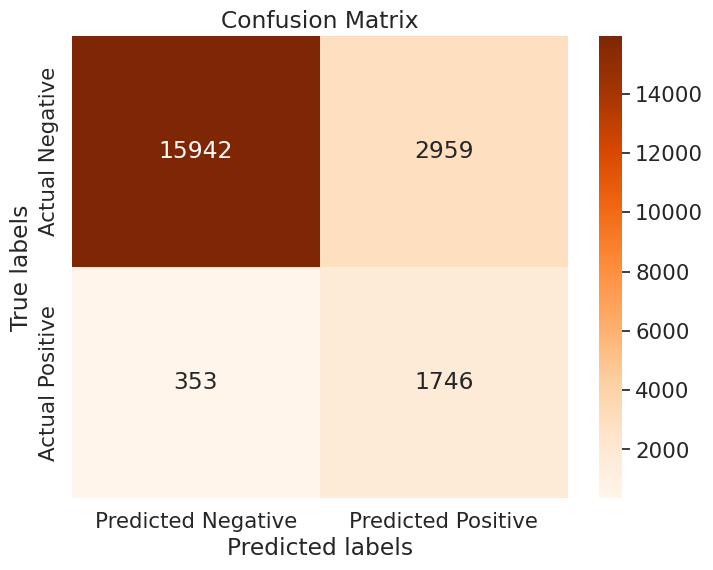

In [81]:
# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix into a 2x2 array
cm_array = np.array(confusion).reshape(2,2)

# Create the heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True, cmap='Oranges', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

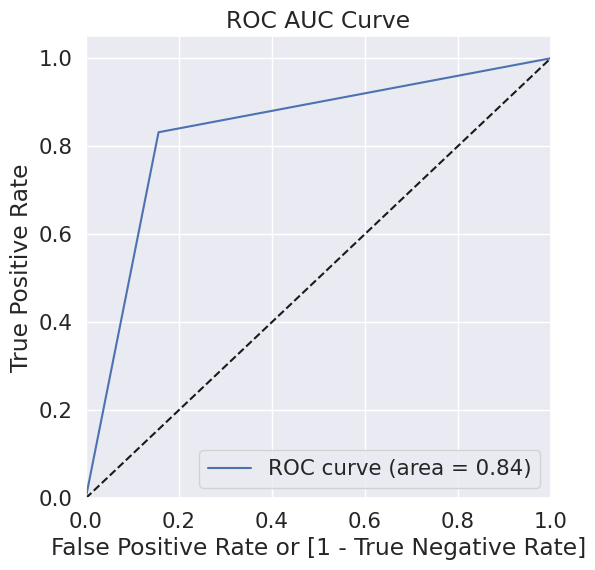

In [82]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

In [83]:
# ROC AUC Score
"{:2.2f}".format(roc_auc_score(y_val, y_val_pred))

'0.84'

#### Model 2 : Logistic Regression with PCA and Hyperparameter Tuning

In [93]:
X_train.shape

(48999, 124)

In [86]:
pca = PCA(random_state=100)

In [90]:
pca.fit(X_train)
pca.components_

array([[ 1.93128741e-01,  2.19161612e-01,  2.12047103e-01, ...,
         2.97520085e-02,  2.96633459e-02,  2.73368903e-02],
       [ 5.97441290e-02,  5.97248353e-02,  6.40023836e-02, ...,
         7.65592381e-02,  7.85841352e-02,  7.51083730e-02],
       [ 4.28383739e-02,  4.68866098e-02,  4.61315594e-02, ...,
         1.45322140e-01,  1.49231375e-01,  1.45811650e-01],
       ...,
       [ 3.27317253e-07, -8.16385754e-07,  1.23276775e-07, ...,
         3.91959910e-08, -1.59727081e-07,  9.13922019e-08],
       [-2.05747546e-07, -5.77341936e-08,  2.15439984e-07, ...,
        -5.21249322e-08, -2.71812014e-08,  6.69232182e-08],
       [ 3.75690398e-08, -2.32864274e-07,  2.34150090e-07, ...,
        -2.72296332e-08,  7.08591716e-08, -5.18566384e-08]])

Looking at the explained variance ratio for each component

In [91]:
pca.explained_variance_ratio_

array([2.67779685e-01, 1.56623677e-01, 1.43206681e-01, 7.54967589e-02,
       5.03225288e-02, 4.54330951e-02, 4.32374433e-02, 3.07770077e-02,
       2.07065484e-02, 2.02266445e-02, 1.54194463e-02, 1.40725065e-02,
       1.23750098e-02, 1.01956273e-02, 8.69386166e-03, 8.07080364e-03,
       7.80396548e-03, 6.58617774e-03, 5.41441307e-03, 5.31173408e-03,
       4.05085201e-03, 4.04512699e-03, 3.90293819e-03, 3.73586502e-03,
       3.49590177e-03, 3.06863849e-03, 2.33566973e-03, 2.28500445e-03,
       2.05230386e-03, 2.01255410e-03, 1.98614189e-03, 1.62457368e-03,
       1.48876303e-03, 1.45017492e-03, 1.35684740e-03, 9.91698910e-04,
       9.33905444e-04, 8.27773209e-04, 7.52756046e-04, 7.43954453e-04,
       7.33094833e-04, 7.06947721e-04, 6.67849189e-04, 6.40494921e-04,
       5.97497647e-04, 5.75363419e-04, 5.55872559e-04, 5.06279839e-04,
       4.64488330e-04, 4.16671767e-04, 3.88597270e-04, 3.73109956e-04,
       3.41868415e-04, 2.63983613e-04, 2.23367836e-04, 2.11197413e-04,
      

Making a scree plot for the explained variance

In [94]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

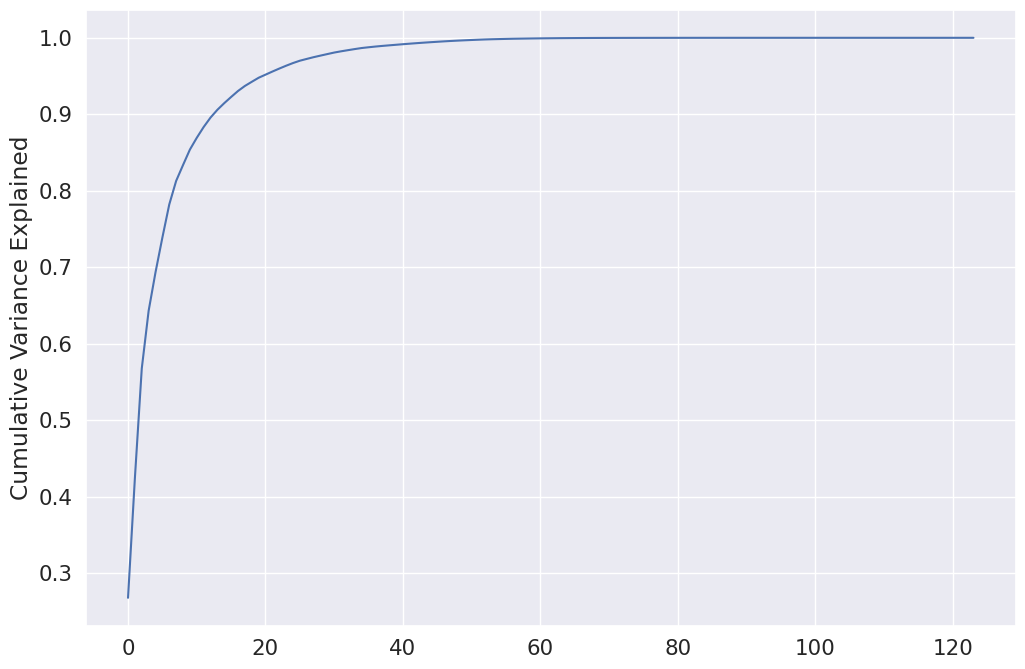

In [96]:
fig = plt.figure(figsize = [12,8])
plt.plot(var_cumu)
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [ ]:
## 20 components explained 95% of the variance so we are going to do PCA with 20 components

#### Perform PCA with 20 components

In [99]:
pca_final = IncrementalPCA(n_components = 20)

In [100]:
df_train_pca = pca_final.fit_transform(X_train)

In [102]:
df_train_pca.shape

(48999, 20)

In [103]:
corrmat = np.corrcoef(df_train_pca.transpose())

Plot the heatmap of the correlation matrix 

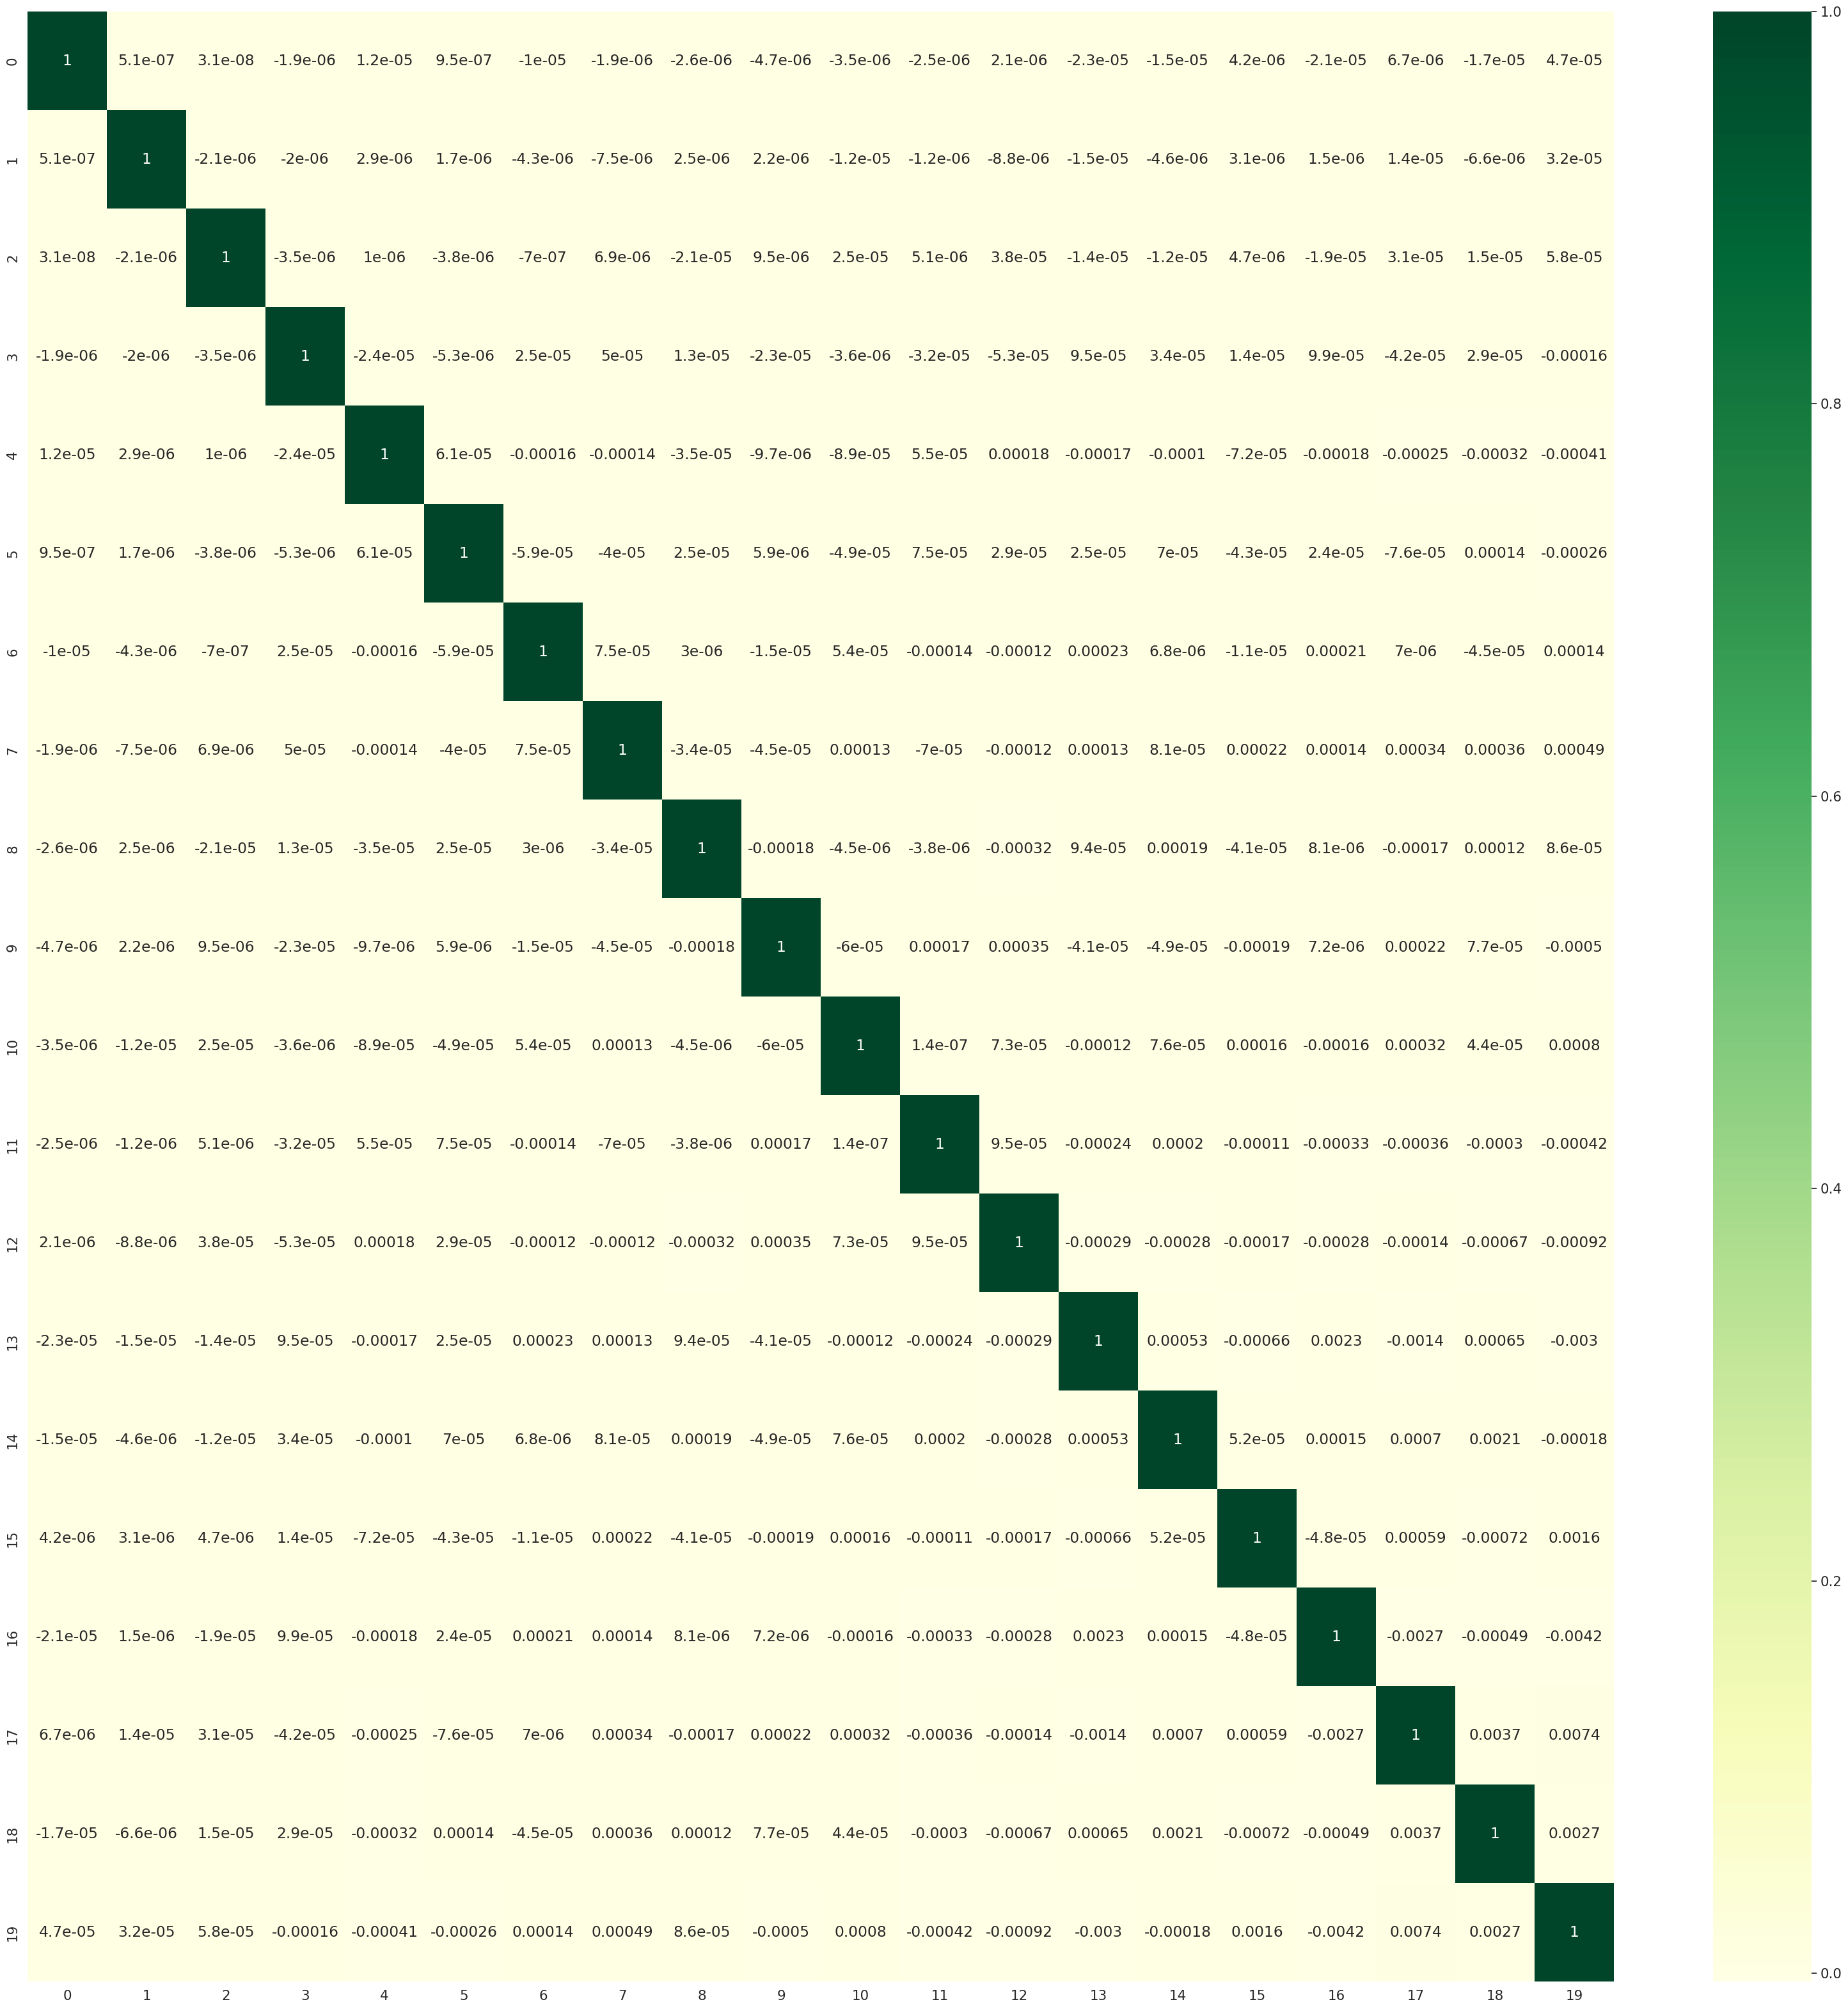

In [108]:
plt.figure(figsize=[40,40])
sns.heatmap(corrmat,annot=True,cmap='YlGn')
plt.show()

None of the components are highly correlated to each other

In [109]:
df_val_pca = pca_final.transform(X_val)
df_val_pca.shape

(21000, 20)

In [110]:
learner_pca = LogisticRegression()

In [114]:
model_pca = learner_pca.fit(df_train_pca,y_train)

Making predicitons on the val set

In [115]:
pred_probs_val = model_pca.predict_proba(df_val_pca)

In [119]:
pred_probs_val.shape

(21000, 2)

In [121]:
# ROC AUC Score
"{:2.2f}".format(roc_auc_score(y_val, pred_probs_val[:,1]))

'0.84'

#### Inference 

Not much Difference between Logistic Regression and Logistic Regression with PCA

#### Model 3 : Decision Tree with PCA and GridSearchCV

In [123]:
dt = DecisionTreeClassifier(random_state=42)

In [124]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
scaler = StandardScaler()
pca = PCA(n_components=20)
smote = SMOTE(random_state=2)

In [125]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    dt
)

In [134]:
# Create the parameter grid based on the results of random search 
params = {
    'decisiontreeclassifier__max_depth': [ 3,4, 5, 10, 20,25],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100,120],
}

In [135]:
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [130]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on train set using the best model
y_train_pred = grid_search.predict(X_train)

# Predict on validation set using the best model
y_val_pred = grid_search.predict(X_val)

In [131]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[39608  4358]
 [  621  4412]]


Metric   Value
0             Accuracy  0.8984
1          Sensitivity  0.8766
2          Specificity  0.9009
3            Precision  0.5031
4  False Positive Rate  0.0991
5   True Positive Rate  0.8766

In [132]:
# Metrics on the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[15826  3075]
 [  727  1372]]


Metric   Value
0             Accuracy  0.8190
1          Sensitivity  0.6536
2          Specificity  0.8373
3            Precision  0.3085
4  False Positive Rate  0.1627
5   True Positive Rate  0.6536

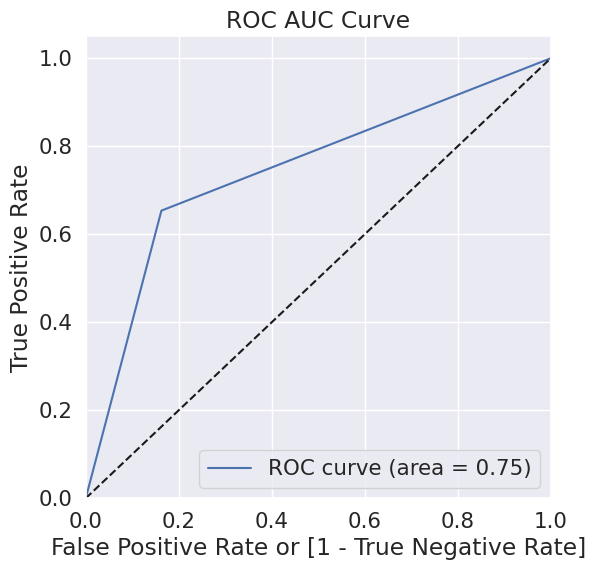

In [133]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)